<a href="https://colab.research.google.com/github/JeelCueva/modelos-arch-garch/blob/main/TESIS_DATA_ISABEL_COMPLETO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
ANÁLISIS ESTADÍSTICO TESIS - PARTE 1: CARGA DE DATOS
==================================================
Análisis completo para tesis de pregrado
Datos: Calidad de Servicio (70 respuestas) + Procesos Administrativos (18 respuestas)
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración para gráficos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

def cargar_datos_exactos():
    """
    Carga TODOS los datos exactos extraídos del Excel
    Returns: df_calidad, df_procesos, metadatos
    """
    print("🔄 Cargando datos exactos de la tesis...")

    # ===== DATOS EXACTOS CALIDAD SERVICIO (70 RESPUESTAS) =====
    datos_calidad = [
        [1, "usuario 1", 4, 3, 4, 3, 4, 4, 3, 4, 4, 4, 3, 3, 4, 3],
        [2, "usuario 2", 4, 3, 3, 4, 4, 4, 4, 3, 4, 4, 3, 3, 4, 4],
        [3, "usuario 3", 1, 1, 2, 2, 1, 1, 2, 2, 3, 3, 2, 3, 2, 2],
        [4, "usuario 4", 1, 1, 2, 2, 1, 1, 2, 2, 3, 3, 2, 3, 2, 2],
        [5, "usuario 5", 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 3, 4, 3],
        [6, "usuario 6", 4, 3, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 2, 4],
        [7, "usuario 7", 4, 3, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 2, 4],
        [8, "usuario 8", 4, 3, 3, 4, 4, 4, 4, 3, 4, 4, 3, 3, 4, 4],
        [9, "usuario 9", 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 3, 4, 3],
        [10, "usuario 10", 1, 1, 2, 2, 1, 1, 2, 2, 3, 3, 2, 3, 2, 2],
        [11, "usuario 11", 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [12, "usuario 12", 5, 4, 2, 4, 5, 4, 4, 4, 4, 3, 4, 4, 3, 4],
        [13, "usuario 13", 4, 4, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4],
        [14, "usuario 14", 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [15, "usuario 15", 5, 5, 4, 4, 5, 4, 4, 5, 5, 5, 5, 5, 4, 5],
        [16, "usuario 16", 4, 5, 3, 5, 5, 5, 4, 5, 5, 4, 4, 4, 4, 5],
        [17, "usuario 17", 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3],
        [18, "usuario 18", 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [19, "usuario 19", 4, 4, 2, 3, 2, 4, 2, 4, 4, 3, 2, 2, 4, 4],
        [20, "usuario 20", 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5],
        [21, "usuario 21", 5, 4, 2, 4, 3, 4, 5, 4, 4, 4, 4, 4, 4, 5],
        [22, "usuario 22", 4, 5, 4, 4, 5, 5, 4, 4, 5, 4, 4, 4, 5, 4],
        [23, "usuario 23", 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [24, "usuario 24", 5, 4, 3, 4, 4, 5, 4, 5, 5, 4, 4, 4, 3, 4],
        [25, "usuario 25", 4, 4, 4, 4, 3, 4, 5, 5, 4, 4, 4, 4, 4, 4],
        [26, "usuario 26", 5, 5, 1, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [27, "usuario 27", 4, 3, 5, 3, 4, 3, 1, 4, 5, 4, 5, 4, 4, 3],
        [28, "usuario 28", 3, 4, 3, 2, 3, 2, 4, 3, 4, 4, 4, 3, 3, 5],
        [29, "usuario 29", 5, 1, 3, 2, 5, 3, 2, 4, 1, 2, 5, 4, 1, 3],
        [30, "usuario 30", 4, 4, 3, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4],
        [31, "usuario 31", 5, 4, 3, 4, 4, 3, 1, 5, 4, 5, 3, 5, 1, 5],
        [32, "usuario 32", 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5],
        [33, "usuario 33", 5, 5, 3, 5, 5, 4, 5, 4, 5, 5, 5, 4, 5, 5],
        [34, "usuario 34", 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [35, "usuario 35", 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [36, "usuario 36", 5, 5, 5, 5, 4, 4, 5, 5, 4, 4, 5, 5, 5, 5],
        [37, "usuario 37", 5, 5, 4, 5, 5, 5, 5, 2, 5, 4, 5, 4, 4, 4],
        [38, "usuario 38", 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5],
        [39, "usuario 39", 4, 4, 4, 4, 5, 4, 5, 4, 5, 4, 5, 4, 4, 5],
        [40, "usuario 40", 4, 4, 3, 5, 5, 5, 4, 4, 4, 3, 4, 4, 5, 4],
        [41, "usuario 41", 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [42, "usuario 42", 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [43, "usuario 43", 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [44, "usuario 44", 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [45, "usuario 45", 5, 4, 5, 5, 5, 5, 4, 4, 5, 5, 5, 4, 4, 4],
        [46, "usuario 46", 5, 4, 5, 5, 5, 5, 4, 4, 5, 5, 5, 4, 4, 4],
        [47, "usuario 47", 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4],
        [48, "usuario 48", 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [49, "usuario 49", 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [50, "usuario 50", 4, 5, 3, 5, 5, 5, 4, 4, 5, 5, 4, 3, 5, 5],
        [51, "usuario 51", 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [52, "usuario 52", 3, 4, 3, 4, 5, 4, 4, 4, 3, 4, 3, 4, 3, 2],
        [53, "usuario 53", 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [54, "usuario 54", 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [55, "usuario 55", 4, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4],
        [56, "usuario 56", 5, 4, 4, 4, 4, 5, 4, 5, 4, 5, 4, 4, 5, 4],
        [57, "usuario 57", 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [58, "usuario 58", 4, 4, 4, 4, 5, 5, 5, 5, 4, 4, 4, 4, 3, 3],
        [59, "usuario 59", 5, 5, 5, 4, 4, 5, 5, 4, 5, 5, 5, 5, 5, 5],
        [60, "usuario 60", 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4],
        [61, "usuario 61", 4, 5, 3, 5, 5, 4, 4, 4, 5, 5, 4, 4, 5, 4],
        [62, "usuario 62", 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [63, "usuario 63", 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4],
        [64, "usuario 64", 5, 4, 1, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2],
        [65, "usuario 65", 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [66, "usuario 66", 4, 4, 3, 3, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3],
        [67, "usuario 67", 4, 2, 2, 3, 4, 4, 4, 4, 3, 2, 2, 2, 2, 2],
        [68, "usuario 68", 4, 5, 3, 4, 4, 4, 5, 3, 4, 3, 3, 3, 3, 5],
        [69, "usuario 69", 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 5, 4, 4, 4],
        [70, "usuario 70", 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 3, 4, 4, 4]
    ]

    # ===== DATOS EXACTOS PROCESOS ADMIN (18 RESPUESTAS) =====
    datos_procesos = [
        [1, "DOCENTE", 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [2, "DOCENTE", 1, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [3, "DOCENTE", 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4],
        [4, "DOCENTE", 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4],
        [5, "DOCENTE", 4, 4, 5, 4, 3, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4],
        [6, "DOCENTE", 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [7, "DOCENTE", 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 5, 4],
        [8, "DOCENTE", 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [9, "DOCENTE", 2, 2, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3],
        [10, "DOCENTE", 5, 5, 5, 4, 3, 3, 5, 5, 4, 5, 5, 4, 5, 4, 3],
        [11, "ADMINISTRATIVO", 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 4, 4, 4, 4, 4],
        [12, "ADMINISTRATIVO", 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [13, "ADMINISTRATIVO", 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [14, "ADMINISTRATIVO", 3, 4, 4, 3, 2, 3, 3, 2, 2, 2, 4, 4, 3, 4, 3],
        [15, "ADMINISTRATIVO", 4, 4, 4, 4, 2, 3, 4, 3, 4, 3, 4, 5, 2, 2, 3],
        [16, "ADMINISTRATIVO", 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4],
        [17, "ADMINISTRATIVO", 5, 5, 5, 4, 4, 3, 5, 3, 3, 5, 5, 5, 5, 4, 4],
        [18, "ADMINISTRATIVO", 4, 4, 4, 4, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 4]
    ]

    # ===== CREAR DATAFRAMES =====
    columnas_calidad = ['ID', 'Usuario'] + [f'Q{i+1}' for i in range(14)]
    columnas_procesos = ['ID', 'TIPO'] + [f'P{i+1}' for i in range(15)]

    df_calidad = pd.DataFrame(datos_calidad, columns=columnas_calidad)
    df_procesos = pd.DataFrame(datos_procesos, columns=columnas_procesos)

    # ===== METADATOS =====
    nombres_calidad = [
        "Cumple servicio prometido",
        "Sistemas digitales confiables",
        "Personal dispuesto a ayudar",
        "Manejo responsable de datos",
        "Conocimiento del proceso educativo",
        "Información digital protegida",
        "Atención personalizada",
        "Interacciones digitales empáticas",
        "Instalaciones bien diseñadas",
        "Infraestructura tecnológica de calidad",
        "Servicios en línea disponibles",
        "Tiempo de respuesta adecuado",
        "Satisfacción con servicios digitales",
        "Información fácilmente accesible"
    ]

    nombres_procesos = [
        "Objetivos estratégicos definidos",
        "Herramientas digitales modernas",
        "Decisiones basadas en datos",
        "Organigrama claro",
        "Coordinación eficiente",
        "Funciones claramente definidas",
        "Comunicación interna eficiente",
        "Herramientas para organización",
        "Técnicas de motivación",
        "Comunicación dirección-personal",
        "Guía efectiva del personal",
        "Plataformas digitales especializadas",
        "Liderazgo efectivo",
        "Control y supervisión",
        "Sistemas de monitoreo digital"
    ]

    metadatos = {
        'nombres_calidad': nombres_calidad,
        'nombres_procesos': nombres_procesos,
        'columnas_calidad': [f'Q{i+1}' for i in range(14)],
        'columnas_procesos': [f'P{i+1}' for i in range(15)],
        'escala_likert': {
            1: "Totalmente en desacuerdo",
            2: "En desacuerdo",
            3: "Ni de acuerdo ni en desacuerdo",
            4: "De acuerdo",
            5: "Totalmente de acuerdo"
        }
    }

    print("✅ DATOS CARGADOS EXITOSAMENTE:")
    print(f"📊 Calidad Servicio: {len(df_calidad)} respuestas, {len(nombres_calidad)} preguntas")
    print(f"📊 Procesos Admin: {len(df_procesos)} respuestas, {len(nombres_procesos)} preguntas")

    return df_calidad, df_procesos, metadatos

# Ejecutar la carga de datos
df_calidad, df_procesos, metadatos = cargar_datos_exactos()

print("\n🎓 PARTE 1 COMPLETADA - DATOS LISTOS PARA ANÁLISIS")
print("="*50)
print("📋 Variables disponibles:")
print("  • df_calidad: DataFrame con 70 respuestas de calidad")
print("  • df_procesos: DataFrame con 18 respuestas de procesos")
print("  • metadatos: Diccionario con información adicional")

🔄 Cargando datos exactos de la tesis...
✅ DATOS CARGADOS EXITOSAMENTE:
📊 Calidad Servicio: 70 respuestas, 14 preguntas
📊 Procesos Admin: 18 respuestas, 15 preguntas

🎓 PARTE 1 COMPLETADA - DATOS LISTOS PARA ANÁLISIS
📋 Variables disponibles:
  • df_calidad: DataFrame con 70 respuestas de calidad
  • df_procesos: DataFrame con 18 respuestas de procesos
  • metadatos: Diccionario con información adicional


In [3]:
"""
ANÁLISIS ESTADÍSTICO TESIS - PARTE 2: ESTADÍSTICAS DESCRIPTIVAS
==============================================================
Análisis descriptivo completo para ambas variables
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import os
warnings.filterwarnings('ignore')

# Configuración mejorada para gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

def guardar_grafico(fig, nombre_archivo, carpeta="Graficos_Tesis"):
    """Guarda una figura en formatos PNG y PDF."""
    if not os.path.exists(carpeta):
        os.makedirs(carpeta)
    if not os.path.exists(os.path.join(carpeta, "PNG")):
        os.makedirs(os.path.join(carpeta, "PNG"))
    if not os.path.exists(os.path.join(carpeta, "PDF")):
        os.makedirs(os.path.join(carpeta, "PDF"))

    fig.savefig(os.path.join(carpeta, "PNG", f"{nombre_archivo}.png"), dpi=300, bbox_inches='tight')
    fig.savefig(os.path.join(carpeta, "PDF", f"{nombre_archivo}.pdf"), bbox_inches='tight')
    plt.close(fig) # Cerrar la figura para liberar memoria
    print(f"   ✅ Gráfico '{nombre_archivo}' guardado.")


def estadisticas_descriptivas_completas(df_calidad, df_procesos, metadatos):
    """
    Calcula estadísticas descriptivas completas para ambas variables
    """
    print("📊 ANÁLISIS ESTADÍSTICO DESCRIPTIVO COMPLETO")
    print("="*60)

    # Extraer columnas numéricas
    cols_calidad = metadatos['columnas_calidad']
    cols_procesos = metadatos['columnas_procesos']

    # ========== CALIDAD DE SERVICIO ==========
    print("\n🔍 VARIABLE 1: CALIDAD DE SERVICIO")
    print("-"*50)

    # Estadísticas por pregunta
    df_cal_num = df_calidad[cols_calidad]

    # 1. Estadísticas básicas
    stats_calidad = pd.DataFrame({
        'Media': df_cal_num.mean(),
        'Mediana': df_cal_num.median(),
        'Moda': df_cal_num.mode().iloc[0],
        'Desv_Std': df_cal_num.std(),
        'Varianza': df_cal_num.var(),
        'Min': df_cal_num.min(),
        'Max': df_cal_num.max(),
        'Rango': df_cal_num.max() - df_cal_num.min(),
        'Q1': df_cal_num.quantile(0.25),
        'Q3': df_cal_num.quantile(0.75),
        'IQR': df_cal_num.quantile(0.75) - df_cal_num.quantile(0.25)
    })

    # Redondear a 3 decimales
    stats_calidad = stats_calidad.round(3)

    # Agregar nombres de preguntas
    stats_calidad['Pregunta'] = metadatos['nombres_calidad']
    stats_calidad = stats_calidad[['Pregunta'] + [col for col in stats_calidad.columns if col != 'Pregunta']]

    print("📈 ESTADÍSTICAS POR PREGUNTA:")
    print(stats_calidad.to_string())

    # 2. Estadísticas globales de Calidad
    print(f"\n📋 ESTADÍSTICAS GLOBALES - CALIDAD DE SERVICIO:")
    media_global_cal = df_cal_num.mean().mean()
    std_global_cal = df_cal_num.stack().std()
    print(f"  • Muestra (n): {len(df_calidad)}")
    print(f"  • Media global: {media_global_cal:.3f}")
    print(f"  • Desviación estándar global: {std_global_cal:.3f}")
    print(f"  • Coeficiente de variación: {(std_global_cal/media_global_cal)*100:.1f}%")
    print(f"  • Pregunta mejor valorada: {stats_calidad.loc[stats_calidad['Media'].idxmax(), 'Pregunta']} (M={stats_calidad['Media'].max():.3f})")
    print(f"  • Pregunta menor valorada: {stats_calidad.loc[stats_calidad['Media'].idxmin(), 'Pregunta']} (M={stats_calidad['Media'].min():.3f})")

    # ========== PROCESOS ADMINISTRATIVOS ==========
    print("\n\n🔍 VARIABLE 2: PROCESOS ADMINISTRATIVOS")
    print("-"*50)

    df_proc_num = df_procesos[cols_procesos]

    # 1. Estadísticas por pregunta
    stats_procesos = pd.DataFrame({
        'Media': df_proc_num.mean(),
        'Mediana': df_proc_num.median(),
        'Moda': df_proc_num.mode().iloc[0],
        'Desv_Std': df_proc_num.std(),
        'Varianza': df_proc_num.var(),
        'Min': df_proc_num.min(),
        'Max': df_proc_num.max(),
        'Rango': df_proc_num.max() - df_proc_num.min(),
        'Q1': df_proc_num.quantile(0.25),
        'Q3': df_proc_num.quantile(0.75),
        'IQR': df_proc_num.quantile(0.75) - df_proc_num.quantile(0.25)
    })

    stats_procesos = stats_procesos.round(3)
    stats_procesos['Pregunta'] = metadatos['nombres_procesos']
    stats_procesos = stats_procesos[['Pregunta'] + [col for col in stats_procesos.columns if col != 'Pregunta']]

    print("📈 ESTADÍSTICAS POR PREGUNTA:")
    print(stats_procesos.to_string())

    # 2. Estadísticas globales de Procesos
    print(f"\n📋 ESTADÍSTICAS GLOBALES - PROCESOS ADMINISTRATIVOS:")
    media_global_proc = df_proc_num.mean().mean()
    std_global_proc = df_proc_num.stack().std()
    print(f"  • Muestra (n): {len(df_procesos)}")
    print(f"  • Media global: {media_global_proc:.3f}")
    print(f"  • Desviación estándar global: {std_global_proc:.3f}")
    print(f"  • Coeficiente de variación: {(std_global_proc/media_global_proc)*100:.1f}%")
    print(f"  • Pregunta mejor valorada: {stats_procesos.loc[stats_procesos['Media'].idxmax(), 'Pregunta']} (M={stats_procesos['Media'].max():.3f})")
    print(f"  • Pregunta menor valorada: {stats_procesos.loc[stats_procesos['Media'].idxmin(), 'Pregunta']} (M={stats_procesos['Media'].min():.3f})")

    # ========== ANÁLISIS POR TIPO DE ENCUESTADO ==========
    print(f"\n📊 ANÁLISIS POR TIPO DE ENCUESTADO:")
    for tipo in df_procesos['TIPO'].unique():
        subset = df_procesos[df_procesos['TIPO'] == tipo]
        subset_num = subset[cols_procesos]
        n_tipo = len(subset)
        media_tipo = subset_num.mean().mean()
        std_tipo = subset_num.stack().std()
        print(f"  • {tipo} (n={n_tipo}): Media = {media_tipo:.3f}, DE = {std_tipo:.3f}")

    return stats_calidad, stats_procesos

def analisis_distribuciones(df_calidad, df_procesos, metadatos):
    """
    Analiza las distribuciones de frecuencias
    """
    print("\n\n📊 ANÁLISIS DE DISTRIBUCIONES")
    print("="*50)

    cols_calidad = metadatos['columnas_calidad']
    cols_procesos = metadatos['columnas_procesos']

    # ========== DISTRIBUCIÓN CALIDAD ==========
    print("\n🔍 DISTRIBUCIÓN DE FRECUENCIAS - CALIDAD DE SERVICIO:")

    # Contar todas las respuestas
    todas_respuestas_cal = df_calidad[cols_calidad].values.flatten()
    frecuencias_cal = pd.Series(todas_respuestas_cal).value_counts().sort_index()
    porcentajes_cal = (frecuencias_cal / len(todas_respuestas_cal) * 100).round(1)

    dist_cal = pd.DataFrame({
        'Frecuencia': frecuencias_cal,
        'Porcentaje': porcentajes_cal,
        'Porcentaje_Acum': porcentajes_cal.cumsum().round(1)
    })

    print("📈 Distribución general:")
    for valor in range(1, 6):
        if valor in dist_cal.index:
            escala = metadatos['escala_likert'][valor]
            freq = dist_cal.loc[valor, 'Frecuencia']
            pct = dist_cal.loc[valor, 'Porcentaje']
            print(f"  {valor} ({escala}): {freq} respuestas ({pct}%)")

    # ========== DISTRIBUCIÓN PROCESOS ==========
    print("\n🔍 DISTRIBUCIÓN DE FRECUENCIAS - PROCESOS ADMINISTRATIVOS:")

    todas_respuestas_proc = df_procesos[cols_procesos].values.flatten()
    frecuencias_proc = pd.Series(todas_respuestas_proc).value_counts().sort_index()
    porcentajes_proc = (frecuencias_proc / len(todas_respuestas_proc) * 100).round(1)

    dist_proc = pd.DataFrame({
        'Frecuencia': frecuencias_proc,
        'Porcentaje': porcentajes_proc,
        'Porcentaje_Acum': porcentajes_proc.cumsum().round(1)
    })

    print("📈 Distribución general:")
    for valor in range(1, 6):
        if valor in dist_proc.index:
            escala = metadatos['escala_likert'][valor]
            freq = dist_proc.loc[valor, 'Frecuencia']
            pct = dist_proc.loc[valor, 'Porcentaje']
            print(f"  {valor} ({escala}): {freq} respuestas ({pct}%)")

    return dist_cal, dist_proc

def crear_graficos_descriptivos(df_calidad, df_procesos, metadatos):
    """
    Crea gráficos descriptivos para ambas variables
    """
    print("\n\n📊 GENERANDO GRÁFICOS DESCRIPTIVOS...")

    cols_calidad = metadatos['columnas_calidad']
    cols_procesos = metadatos['columnas_procesos']

    # ========== GRÁFICO 1: DISTRIBUCIONES GENERALES ==========
    fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    fig1.suptitle('ANÁLISIS DESCRIPTIVO DE VARIABLES', fontsize=16, fontweight='bold')

    # Distribución Calidad
    todas_resp_cal = df_calidad[cols_calidad].values.flatten()
    freq_cal = pd.Series(todas_resp_cal).value_counts().sort_index()
    pct_cal = (freq_cal / len(todas_resp_cal) * 100)

    ax1.bar(freq_cal.index, pct_cal.values, color='skyblue', alpha=0.7, edgecolor='navy')
    ax1.set_title('Distribución Calidad de Servicio\n(n=70, 980 respuestas)', fontweight='bold')
    ax1.set_xlabel('Escala Likert')
    ax1.set_ylabel('Porcentaje (%)')
    ax1.set_xticks(range(1, 6))
    ax1.grid(axis='y', alpha=0.3)

    # Añadir porcentajes en las barras
    for i, v in enumerate(pct_cal.values):
        ax1.text(freq_cal.index[i], v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

    # Distribución Procesos
    todas_resp_proc = df_procesos[cols_procesos].values.flatten()
    freq_proc = pd.Series(todas_resp_proc).value_counts().sort_index()
    pct_proc = (freq_proc / len(todas_resp_proc) * 100)

    ax2.bar(freq_proc.index, pct_proc.values, color='lightcoral', alpha=0.7, edgecolor='darkred')
    ax2.set_title('Distribución Procesos Administrativos\n(n=18, 270 respuestas)', fontweight='bold')
    ax2.set_xlabel('Escala Likert')
    ax2.set_ylabel('Porcentaje (%)')
    ax2.set_xticks(range(1, 6))
    ax2.grid(axis='y', alpha=0.3)

    for i, v in enumerate(pct_proc.values):
        ax2.text(freq_proc.index[i], v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

    # Boxplot Calidad
    df_calidad[cols_calidad].boxplot(ax=ax3)
    ax3.set_title('Distribución por Pregunta - Calidad de Servicio', fontweight='bold')
    ax3.set_xlabel('Preguntas')
    ax3.set_ylabel('Puntuación')
    ax3.tick_params(axis='x', rotation=45)
    ax3.grid(True, alpha=0.3)

    # Boxplot Procesos
    df_procesos[cols_procesos].boxplot(ax=ax4)
    ax4.set_title('Distribución por Pregunta - Procesos Administrativos', fontweight='bold')
    ax4.set_xlabel('Preguntas')
    ax4.set_ylabel('Puntuación')
    ax4.tick_params(axis='x', rotation=45)
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    guardar_grafico(fig1, '01_Distribuciones_Generales')


    # ========== GRÁFICO 2: MEDIAS POR PREGUNTA ==========
    fig2, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

    # Medias Calidad
    medias_cal = df_calidad[cols_calidad].mean()
    ax1.bar(range(len(medias_cal)), medias_cal.values, color='steelblue', alpha=0.7)
    ax1.set_title('Media por Pregunta - Calidad de Servicio', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Preguntas')
    ax1.set_ylabel('Media')
    ax1.set_xticks(range(len(medias_cal)))
    ax1.set_xticklabels([f'Q{i+1}' for i in range(len(medias_cal))], rotation=45)
    ax1.grid(axis='y', alpha=0.3)
    ax1.axhline(y=medias_cal.mean(), color='red', linestyle='--', label=f'Media Global: {medias_cal.mean():.2f}')
    ax1.legend()

    # Añadir valores en las barras
    for i, v in enumerate(medias_cal.values):
        ax1.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

    # Medias Procesos
    medias_proc = df_procesos[cols_procesos].mean()
    ax2.bar(range(len(medias_proc)), medias_proc.values, color='crimson', alpha=0.7)
    ax2.set_title('Media por Pregunta - Procesos Administrativos', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Preguntas')
    ax2.set_ylabel('Media')
    ax2.set_xticks(range(len(medias_proc)))
    ax2.set_xticklabels([f'P{i+1}' for i in range(len(medias_proc))], rotation=45)
    ax2.grid(axis='y', alpha=0.3)
    ax2.axhline(y=medias_proc.mean(), color='blue', linestyle='--', label=f'Media Global: {medias_proc.mean():.2f}')
    ax2.legend()

    for i, v in enumerate(medias_proc.values):
        ax2.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    guardar_grafico(fig2, '02_Medias_Comparativas')


    # ========== GRÁFICO 3: COMPARACIÓN POR TIPO ==========
    if len(df_procesos['TIPO'].unique()) > 1:
        fig3, ax = plt.subplots(figsize=(12, 6))

        # Calcular medias por tipo
        tipos = df_procesos['TIPO'].unique()
        medias_por_tipo = []

        for tipo in tipos:
            subset = df_procesos[df_procesos['TIPO'] == tipo]
            media_tipo = subset[cols_procesos].mean().mean()
            medias_por_tipo.append(media_tipo)

        bars = ax.bar(tipos, medias_por_tipo, color=['gold', 'lightgreen'], alpha=0.7, edgecolor='black')
        ax.set_title('Comparación de Medias por Tipo de Encuestado\nProcesos Administrativos',
                    fontsize=14, fontweight='bold')
        ax.set_ylabel('Media General')
        ax.grid(axis='y', alpha=0.3)

        # Añadir valores y conteos
        for i, (bar, tipo) in enumerate(zip(bars, tipos)):
            altura = bar.get_height()
            n_tipo = len(df_procesos[df_procesos['TIPO'] == tipo])
            ax.text(bar.get_x() + bar.get_width()/2., altura + 0.02,
                   f'{altura:.2f}\n(n={n_tipo})', ha='center', va='bottom', fontweight='bold')

        plt.tight_layout()
        guardar_grafico(fig3, '03_Comparacion_Grupos')


def resumen_ejecutivo(df_calidad, df_procesos, metadatos):
    """
    Genera un resumen ejecutivo de los hallazgos descriptivos
    """
    print("\n\n📋 RESUMEN EJECUTIVO - ESTADÍSTICAS DESCRIPTIVAS")
    print("="*60)

    cols_calidad = metadatos['columnas_calidad']
    cols_procesos = metadatos['columnas_procesos']

    # Calcular métricas clave
    media_cal = df_calidad[cols_calidad].mean().mean()
    media_proc = df_procesos[cols_procesos].mean().mean()

    std_cal = df_calidad[cols_calidad].stack().std()
    std_proc = df_procesos[cols_procesos].stack().std()

    # Distribuciones
    todas_resp_cal = df_calidad[cols_calidad].values.flatten()
    todas_resp_proc = df_procesos[cols_procesos].values.flatten()

    satisfechos_cal = np.sum(todas_resp_cal >= 4) / len(todas_resp_cal) * 100
    satisfechos_proc = np.sum(todas_resp_proc >= 4) / len(todas_resp_proc) * 100

    print("🎯 HALLAZGOS PRINCIPALES:")
    print(f"\n📊 CALIDAD DE SERVICIO:")
    print(f"  • Media general: {media_cal:.2f}/5.0 ({(media_cal/5)*100:.1f}%)")
    print(f"  • Desviación estándar: {std_cal:.2f}")
    print(f"  • Nivel de satisfacción: {satisfechos_cal:.1f}% (respuestas ≥4)")
    print(f"  • Interpretación: {'ALTA' if media_cal >= 4 else 'MODERADA' if media_cal >= 3 else 'BAJA'} calidad percibida")

    print(f"\n📊 PROCESOS ADMINISTRATIVOS:")
    print(f"  • Media general: {media_proc:.2f}/5.0 ({(media_proc/5)*100:.1f}%)")
    print(f"  • Desviación estándar: {std_proc:.2f}")
    print(f"  • Nivel de satisfacción: {satisfechos_proc:.1f}% (respuestas ≥4)")
    print(f"  • Interpretación: {'ALTA' if media_proc >= 4 else 'MODERADA' if media_proc >= 3 else 'BAJA'} eficiencia percibida")

    # Comparación entre variables
    diferencia = abs(media_cal - media_proc)
    print(f"\n🔄 COMPARACIÓN ENTRE VARIABLES:")
    print(f"  • Diferencia de medias: {diferencia:.3f}")
    print(f"  • Variable mejor valorada: {'Calidad de Servicio' if media_cal > media_proc else 'Procesos Administrativos' if media_proc > media_cal else 'Similares'}")

    # Recomendaciones
    print(f"\n💡 RECOMENDACIONES PARA EL ANÁLISIS:")
    print(f"  • Ambas variables muestran {'alta' if min(media_cal, media_proc) >= 4 else 'moderada'} valoración")
    print(f"  • La variabilidad es {'baja' if max(std_cal, std_proc) < 1 else 'moderada' if max(std_cal, std_proc) < 1.5 else 'alta'}")
    print(f"  • Proceder con análisis inferencial para determinar relaciones")

# ========== EJECUTAR ANÁLISIS COMPLETO ==========
if __name__ == "__main__":
    print("🎓 EJECUTANDO PARTE 2: ESTADÍSTICAS DESCRIPTIVAS")
    print("="*60)

    # 1. Estadísticas descriptivas completas
    stats_cal, stats_proc = estadisticas_descriptivas_completas(df_calidad, df_procesos, metadatos)

    # 2. Análisis de distribuciones
    dist_cal, dist_proc = analisis_distribuciones(df_calidad, df_procesos, metadatos)

    # 3. Crear gráficos
    crear_graficos_descriptivos(df_calidad, df_procesos, metadatos)

    # 4. Resumen ejecutivo
    resumen_ejecutivo(df_calidad, df_procesos, metadatos)

    print(f"\n🎉 PARTE 2 COMPLETADA")
    print(f"📊 Variables adicionales creadas: stats_cal, stats_proc, dist_cal, dist_proc")
    print(f"🚀 Listo para PARTE 3: Análisis Inferencial")

🎓 EJECUTANDO PARTE 2: ESTADÍSTICAS DESCRIPTIVAS
📊 ANÁLISIS ESTADÍSTICO DESCRIPTIVO COMPLETO

🔍 VARIABLE 1: CALIDAD DE SERVICIO
--------------------------------------------------
📈 ESTADÍSTICAS POR PREGUNTA:
                Pregunta  Media  Mediana  Moda  Desv_Std  Varianza  Min  Max  Rango   Q1   Q3  IQR
Q1    Pregunta Calidad 1  3.586      4.0     4     1.148     1.319    1    5      4  3.0  4.0  1.0
Q2    Pregunta Calidad 2  3.671      4.0     4     1.176     1.383    1    5      4  3.0  5.0  2.0
Q3    Pregunta Calidad 3  3.514      4.0     4     1.164     1.355    1    5      4  3.0  4.0  1.0
Q4    Pregunta Calidad 4  3.957      4.0     4     0.955     0.911    1    5      4  4.0  5.0  1.0
Q5    Pregunta Calidad 5  3.443      4.0     4     1.199     1.439    1    5      4  3.0  4.0  1.0
Q6    Pregunta Calidad 6  3.786      4.0     5     1.203     1.446    1    5      4  3.0  5.0  2.0
Q7    Pregunta Calidad 7  3.671      4.0     4     1.282     1.644    1    5      4  2.0  5.0  3.0
Q

In [ ]:
"""
ANÁLISIS DE CONFIABILIDAD (ALPHA DE CRONBACH)
=====================================================
Análisis de confiabilidad (Alpha de Cronbach) y otros análisis avanzados.
"""
!pip install pingouin

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg # pingouin es excelente para Alpha de Cronbach
import warnings
warnings.filterwarnings('ignore')

# Configuración para gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)

def analisis_confiabilidad_cronbach(df_calidad, df_procesos, metadatos):
    """
    Calcula el Alpha de Cronbach para ambas escalas
    """
    print("✅ ANALISIS DE CONFIABILIDAD (ALPHA DE CRONBACH)")
    print("="*60)

    cols_calidad = metadatos['columnas_calidad']
    cols_procesos = metadatos['columnas_procesos']

    # ========== ALPHA DE CRONBACH CALIDAD DE SERVICIO ==========
    print("\n📊 CALIDAD DE SERVICIO:")
    print("-"*30)

    # pingouin requiere que las columnas sean solo las de los ítems
    df_calidad_items = df_calidad[cols_calidad]

    # Calcular Alpha de Cronbach
    alpha_calidad = pg.cronbach_alpha(data=df_calidad_items)

    print(f"  • Alpha de Cronbach: {alpha_calidad[0]:.3f}")
    print(f"  • Intervalo de Confianza 95%: [{alpha_calidad[1][0]:.3f}, {alpha_calidad[1][1]:.3f}]")
    # print(f"  • Número de ítems: {alpha_calidad[2]}") # This line caused the error

    print(f"\n  Interpretación: {interpret_alpha(alpha_calidad[0])}")

    # ========== ALPHA DE CRONBACH PROCESOS ADMINISTRATIVOS ==========
    print("\n\n📊 PROCESOS ADMINISTRATIVOS:")
    print("-"*30)

    df_procesos_items = df_procesos[cols_procesos]

    alpha_procesos = pg.cronbach_alpha(data=df_procesos_items)

    print(f"  • Alpha de Cronbach: {alpha_procesos[0]:.3f}")
    print(f"  • Intervalo de Confianza 95%: [{alpha_procesos[1][0]:.3f}, {alpha_procesos[1][1]:.3f}]")
    # print(f"  • Número de ítems: {alpha_procesos[2]}") # This line caused the error

    print(f"\n  Interpretación: {interpret_alpha(alpha_procesos[0])}")

    return {
        'alpha_calidad': alpha_calidad,
        'alpha_procesos': alpha_procesos
    }

def interpret_alpha(alpha):
    """Interpreta el valor del Alpha de Cronbach"""
    if alpha >= 0.9:
        return "Excelente confiabilidad"
    elif alpha >= 0.8:
        return "Muy buena confiabilidad"
    elif alpha >= 0.7:
        return "Buena confiabilidad"
    elif alpha >= 0.6:
        return "Confiabilidad aceptable"
    elif alpha >= 0.5:
        return "Confiabilidad baja (cuestionable)"
    else:
        return "Confiabilidad inaceptable"


# ========== EJECUTAR ANÁLISIS AVANZADO COMPLETO ==========
if __name__ == "__main__":
    print("🎓 EJECUTANDO PARTE 4: ANÁLISIS AVANZADO")
    print("="*60)

    # 1. Análisis de Confiabilidad (Alpha de Cronbach)
    resultados_confiabilidad = analisis_confiabilidad_cronbach(df_calidad, df_procesos, metadatos)


    print(f"\n🎉 PARTE 4 COMPLETADA")
    #print(f"🚀 Listo para PARTE 5: Análisis de Regresión")

🎓 EJECUTANDO PARTE 4: ANÁLISIS AVANZADO
✅ ANALISIS DE CONFIABILIDAD (ALPHA DE CRONBACH)

📊 CALIDAD DE SERVICIO:
------------------------------
  • Alpha de Cronbach: 0.961
  • Intervalo de Confianza 95%: [0.946, 0.973]

  Interpretación: Excelente confiabilidad


📊 PROCESOS ADMINISTRATIVOS:
------------------------------
  • Alpha de Cronbach: 0.950
  • Intervalo de Confianza 95%: [0.909, 0.978]

  Interpretación: Excelente confiabilidad

🎉 PARTE 4 COMPLETADA


In [5]:
"""
ANÁLISIS ESTADÍSTICO TESIS - PARTE 3: ANÁLISIS INFERENCIAL
==========================================================
Pruebas de normalidad, correlaciones, comparaciones y pruebas de hipótesis
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, normaltest, kstest, pearsonr, spearmanr, mannwhitneyu, ttest_ind
import warnings
import os
warnings.filterwarnings('ignore')

# Configuración para gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)

def guardar_grafico(fig, nombre_archivo, carpeta="Graficos_Tesis"):
    """Guarda una figura en formatos PNG y PDF."""
    if not os.path.exists(carpeta):
        os.makedirs(carpeta)
    if not os.path.exists(os.path.join(carpeta, "PNG")):
        os.makedirs(os.path.join(carpeta, "PNG"))
    if not os.path.exists(os.path.join(carpeta, "PDF")):
        os.makedirs(os.path.join(carpeta, "PDF"))

    fig.savefig(os.path.join(carpeta, "PNG", f"{nombre_archivo}.png"), dpi=300, bbox_inches='tight')
    fig.savefig(os.path.join(carpeta, "PDF", f"{nombre_archivo}.pdf"), bbox_inches='tight')
    plt.close(fig) # Cerrar la figura para liberar memoria
    print(f"   ✅ Gráfico '{nombre_archivo}' guardado.")

def pruebas_normalidad_completas(df_calidad, df_procesos, metadatos):
    """
    Realiza pruebas de normalidad completas para ambas variables
    """
    print("🔬 PRUEBAS DE NORMALIDAD")
    print("="*50)

    cols_calidad = metadatos['columnas_calidad']
    cols_procesos = metadatos['columnas_procesos']

    # ========== NORMALIDAD CALIDAD DE SERVICIO ==========
    print("\n📊 CALIDAD DE SERVICIO:")
    print("-"*30)

    # Calcular score total por encuestado
    df_calidad['SCORE_TOTAL'] = df_calidad[cols_calidad].sum(axis=1)
    df_calidad['SCORE_PROMEDIO'] = df_calidad[cols_calidad].mean(axis=1)

    # Pruebas de normalidad para score total
    score_cal = df_calidad['SCORE_TOTAL']

    # Shapiro-Wilk (mejor para n < 50, pero funciona hasta n=5000)
    shapiro_stat_cal, shapiro_p_cal = shapiro(score_cal)

    # Kolmogorov-Smirnov
    ks_stat_cal, ks_p_cal = kstest(score_cal, 'norm', args=(score_cal.mean(), score_cal.std()))

    # D'Agostino-Pearson
    dagostino_stat_cal, dagostino_p_cal = normaltest(score_cal)

    print(f"📈 Estadísticas del Score Total (suma de 14 preguntas):")
    print(f"  • Media: {score_cal.mean():.2f}")
    print(f"  • Desviación estándar: {score_cal.std():.2f}")
    print(f"  • Rango: {score_cal.min()} - {score_cal.max()}")
    print(f"  • Asimetría: {stats.skew(score_cal):.3f}")
    print(f"  • Curtosis: {stats.kurtosis(score_cal):.3f}")

    print(f"\n🔬 Pruebas de Normalidad:")
    print(f"  • Shapiro-Wilk: estadístico = {shapiro_stat_cal:.4f}, p-valor = {shapiro_p_cal:.4f}")
    print(f"    Interpretación: {'NORMAL' if shapiro_p_cal > 0.05 else 'NO NORMAL'} (α=0.05)")

    print(f"  • Kolmogorov-Smirnov: estadístico = {ks_stat_cal:.4f}, p-valor = {ks_p_cal:.4f}")
    print(f"    Interpretación: {'NORMAL' if ks_p_cal > 0.05 else 'NO NORMAL'} (α=0.05)")

    print(f"  • D'Agostino-Pearson: estadístico = {dagostino_stat_cal:.4f}, p-valor = {dagostino_p_cal:.4f}")
    print(f"    Interpretación: {'NORMAL' if dagostino_p_cal > 0.05 else 'NO NORMAL'} (α=0.05)")

    # ========== NORMALIDAD PROCESOS ADMINISTRATIVOS ==========
    print("\n\n📊 PROCESOS ADMINISTRATIVOS:")
    print("-"*30)

    df_procesos['SCORE_TOTAL'] = df_procesos[cols_procesos].sum(axis=1)
    df_procesos['SCORE_PROMEDIO'] = df_procesos[cols_procesos].mean(axis=1)

    score_proc = df_procesos['SCORE_TOTAL']

    # Pruebas de normalidad
    shapiro_stat_proc, shapiro_p_proc = shapiro(score_proc)
    ks_stat_proc, ks_p_proc = kstest(score_proc, 'norm', args=(score_proc.mean(), score_proc.std()))
    dagostino_stat_proc, dagostino_p_proc = normaltest(score_proc)

    print(f"📈 Estadísticas del Score Total (suma de 15 preguntas):")
    print(f"  • Media: {score_proc.mean():.2f}")
    print(f"  • Desviación estándar: {score_proc.std():.2f}")
    print(f"  • Rango: {score_proc.min()} - {score_proc.max()}")
    print(f"  • Asimetría: {stats.skew(score_proc):.3f}")
    print(f"  • Curtosis: {stats.kurtosis(score_proc):.3f}")

    print(f"\n🔬 Pruebas de Normalidad:")
    print(f"  • Shapiro-Wilk: estadístico = {shapiro_stat_proc:.4f}, p-valor = {shapiro_p_proc:.4f}")
    print(f"    Interpretación: {'NORMAL' if shapiro_p_proc > 0.05 else 'NO NORMAL'} (α=0.05)")

    print(f"  • Kolmogorov-Smirnov: estadístico = {ks_stat_proc:.4f}, p-valor = {ks_p_proc:.4f}")
    print(f"    Interpretación: {'NORMAL' if ks_p_proc > 0.05 else 'NO NORMAL'} (α=0.05)")

    print(f"  • D'Agostino-Pearson: estadístico = {dagostino_stat_proc:.4f}, p-valor = {dagostino_p_proc:.4f}")
    print(f"    Interpretación: {'NORMAL' if dagostino_p_proc > 0.05 else 'NO NORMAL'} (α=0.05)")

    # ========== RECOMENDACIONES ==========
    normal_cal = (shapiro_p_cal > 0.05 and ks_p_cal > 0.05 and dagostino_p_cal > 0.05)
    normal_proc = (shapiro_p_proc > 0.05 and ks_p_proc > 0.05 and dagostino_p_proc > 0.05)

    print(f"\n💡 RECOMENDACIONES PARA ANÁLISIS:")
    print(f"  • Calidad de Servicio: {'Usar pruebas paramétricas' if normal_cal else 'Usar pruebas no paramétricas'}")
    print(f"  • Procesos Administrativos: {'Usar pruebas paramétricas' if normal_proc else 'Usar pruebas no paramétricas'}")

    return {
        'calidad': {
            'normal': normal_cal,
            'shapiro_p': shapiro_p_cal,
            'ks_p': ks_p_cal,
            'dagostino_p': dagostino_p_cal,
            'score': score_cal
        },
        'procesos': {
            'normal': normal_proc,
            'shapiro_p': shapiro_p_proc,
            'ks_p': ks_p_proc,
            'dagostino_p': dagostino_p_proc,
            'score': score_proc
        }
    }

def analisis_correlaciones(df_calidad, df_procesos, metadatos):
    """
    Análisis de correlaciones internas y entre variables
    """
    print("\n\n📊 ANÁLISIS DE CORRELACIONES")
    print("="*50)

    cols_calidad = metadatos['columnas_calidad']
    cols_procesos = metadatos['columnas_procesos']

    # ========== CORRELACIONES INTERNAS CALIDAD ==========
    print("\n🔍 CORRELACIONES INTERNAS - CALIDAD DE SERVICIO:")

    corr_calidad = df_calidad[cols_calidad].corr()

    # Estadísticas de correlación
    corr_values = corr_calidad.values
    corr_triu = np.triu(corr_values, k=1)  # Solo triángulo superior
    corr_no_diag = corr_triu[corr_triu != 0]  # Quitar diagonal

    print(f"  • Correlación promedio: {corr_no_diag.mean():.3f}")
    print(f"  • Correlación máxima: {corr_no_diag.max():.3f}")
    print(f"  • Correlación mínima: {corr_no_diag.min():.3f}")
    print(f"  • Número de correlaciones fuertes (r > 0.7): {np.sum(corr_no_diag > 0.7)}")
    print(f"  • Número de correlaciones moderadas (0.3 < r ≤ 0.7): {np.sum((corr_no_diag > 0.3) & (corr_no_diag <= 0.7))}")

    # ========== CORRELACIONES INTERNAS PROCESOS ==========
    print("\n🔍 CORRELACIONES INTERNAS - PROCESOS ADMINISTRATIVOS:")

    corr_procesos = df_procesos[cols_procesos].corr()

    corr_values_proc = corr_procesos.values
    corr_triu_proc = np.triu(corr_values_proc, k=1)
    corr_no_diag_proc = corr_triu_proc[corr_triu_proc != 0]

    print(f"  • Correlación promedio: {corr_no_diag_proc.mean():.3f}")
    print(f"  • Correlación máxima: {corr_no_diag_proc.max():.3f}")
    print(f"  • Correlación mínima: {corr_no_diag_proc.min():.3f}")
    print(f"  • Número de correlaciones fuertes (r > 0.7): {np.sum(corr_no_diag_proc > 0.7)}")
    print(f"  • Número de correlaciones moderadas (0.3 < r ≤ 0.7): {np.sum((corr_no_diag_proc > 0.3) & (corr_no_diag_proc <= 0.7))}")

    # ========== CORRELACIÓN ENTRE VARIABLES ==========
    print(f"\n🔄 CORRELACIÓN ENTRE VARIABLES PRINCIPALES:")

    # Usar scores totales para la correlación
    score_cal = df_calidad['SCORE_TOTAL']
    score_proc = df_procesos['SCORE_PROMEDIO']  # Usar promedio porque tienen diferentes números de preguntas

    # Como tenemos diferentes tamaños de muestra, necesitamos un enfoque diferente
    # Opción 1: Correlación usando solo los primeros 18 casos de calidad
    score_cal_subset = score_cal[:18]  # Primeros 18 para igualar procesos

    # Correlación de Pearson
    pearson_r, pearson_p = pearsonr(score_cal_subset, score_proc)

    # Correlación de Spearman (no paramétrica)
    spearman_r, spearman_p = spearmanr(score_cal_subset, score_proc)

    print(f"  • Muestra utilizada: n = 18 (primeros casos de calidad)")
    print(f"  • Correlación de Pearson: r = {pearson_r:.3f}, p-valor = {pearson_p:.4f}")
    print(f"    Interpretación: {'Significativa' if pearson_p < 0.05 else 'No significativa'} (α=0.05)")
    print(f"    Magnitud: {interpret_correlation(abs(pearson_r))}")

    print(f"  • Correlación de Spearman: ρ = {spearman_r:.3f}, p-valor = {spearman_p:.4f}")
    print(f"    Interpretación: {'Significativa' if spearman_p < 0.05 else 'No significativa'} (α=0.05)")
    print(f"    Magnitud: {interpret_correlation(abs(spearman_r))}")

    return {
        'corr_calidad': corr_calidad,
        'corr_procesos': corr_procesos,
        'pearson_r': pearson_r,
        'pearson_p': pearson_p,
        'spearman_r': spearman_r,
        'spearman_p': spearman_p
    }

def interpret_correlation(r):
    """Interpreta la magnitud de la correlación"""
    if r < 0.1:
        return "Muy débil"
    elif r < 0.3:
        return "Débil"
    elif r < 0.5:
        return "Moderada"
    elif r < 0.7:
        return "Moderada-fuerte"
    elif r < 0.9:
        return "Fuerte"
    else:
        return "Muy fuerte"

def comparacion_grupos(df_procesos, metadatos):
    """
    Compara grupos (Docentes vs Administrativos) en Procesos Administrativos
    """
    print(f"\n\n👥 COMPARACIÓN ENTRE GRUPOS")
    print("="*50)

    cols_procesos = metadatos['columnas_procesos']

    # Separar grupos
    docentes = df_procesos[df_procesos['TIPO'] == 'DOCENTE']
    administrativos = df_procesos[df_procesos['TIPO'] == 'ADMINISTRATIVO']

    # Calcular scores
    score_docentes = docentes[cols_procesos].mean(axis=1)
    score_administrativos = administrativos[cols_procesos].mean(axis=1)

    print(f"📊 ESTADÍSTICAS DESCRIPTIVAS POR GRUPO:")
    print(f"\n🎓 DOCENTES (n = {len(docentes)}):")
    print(f"  • Media: {score_docentes.mean():.3f}")
    print(f"  • Desviación estándar: {score_docentes.std():.3f}")
    print(f"  • Mediana: {score_docentes.median():.3f}")
    print(f"  • Rango: {score_docentes.min():.3f} - {score_docentes.max():.3f}")

    print(f"\n🏢 ADMINISTRATIVOS (n = {len(administrativos)}):")
    print(f"  • Media: {score_administrativos.mean():.3f}")
    print(f"  • Desviación estándar: {score_administrativos.std():.3f}")
    print(f"  • Mediana: {score_administrativos.median():.3f}")
    print(f"  • Rango: {score_administrativos.min():.3f} - {score_administrativos.max():.3f}")

    # ========== PRUEBAS ESTADÍSTICAS ==========
    print(f"\n🔬 PRUEBAS DE COMPARACIÓN:")

    # Diferencia de medias
    diferencia_medias = score_docentes.mean() - score_administrativos.mean()
    print(f"  • Diferencia de medias: {diferencia_medias:.3f}")

    # Prueba t de Student (paramétrica)
    t_stat, t_p = ttest_ind(score_docentes, score_administrativos, equal_var=False)

    print(f"\n📈 Prueba t de Student (Welch):")
    print(f"  • Estadístico t: {t_stat:.3f}")
    print(f"  • p-valor: {t_p:.4f}")
    print(f"  • Interpretación: {'Diferencia significativa' if t_p < 0.05 else 'Sin diferencia significativa'} (α=0.05)")

    # Prueba U de Mann-Whitney (no paramétrica)
    u_stat, u_p = mannwhitneyu(score_docentes, score_administrativos, alternative='two-sided')

    print(f"\n📈 Prueba U de Mann-Whitney:")
    print(f"  • Estadístico U: {u_stat:.3f}")
    print(f"  • p-valor: {u_p:.4f}")
    print(f"  • Interpretación: {'Diferencia significativa' if u_p < 0.05 else 'Sin diferencia significativa'} (α=0.05)")

    # Tamaño del efecto (d de Cohen)
    pooled_std = np.sqrt(((len(score_docentes)-1)*score_docentes.var() +
                         (len(score_administrativos)-1)*score_administrativos.var()) /
                        (len(score_docentes) + len(score_administrativos) - 2))

    cohens_d = diferencia_medias / pooled_std

    print(f"\n📏 Tamaño del efecto (d de Cohen): {cohens_d:.3f}")
    print(f"  • Interpretación: {interpret_effect_size(abs(cohens_d))}")

    return {
        'docentes_score': score_docentes,
        'administrativos_score': score_administrativos,
        'diferencia_medias': diferencia_medias,
        't_stat': t_stat,
        't_p': t_p,
        'u_stat': u_stat,
        'u_p': u_p,
        'cohens_d': cohens_d
    }

def interpret_effect_size(d):
    """Interpreta el tamaño del efecto d de Cohen"""
    if d < 0.2:
        return "Efecto trivial"
    elif d < 0.5:
        return "Efecto pequeño"
    elif d < 0.8:
        return "Efecto moderado"
    else:
        return "Efecto grande"

def crear_graficos_inferenciales(df_calidad, df_procesos, metadatos, resultados_normalidad, resultados_correlacion):
    """
    Crea gráficos para el análisis inferencial
    """
    print(f"\n\n📊 GENERANDO GRÁFICOS INFERENCIALES...")

    # ========== GRÁFICO 1: Q-Q PLOTS PARA NORMALIDAD ==========
    fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    fig1.suptitle('ANÁLISIS DE NORMALIDAD', fontsize=16, fontweight='bold')

    # Q-Q Plot Calidad
    stats.probplot(resultados_normalidad['calidad']['score'], dist="norm", plot=ax1)
    ax1.set_title('Q-Q Plot - Calidad de Servicio\n(Score Total)', fontweight='bold')
    ax1.grid(True, alpha=0.3)

    # Histograma Calidad con curva normal
    score_cal = resultados_normalidad['calidad']['score']
    ax2.hist(score_cal, bins=10, density=True, alpha=0.7, color='skyblue', edgecolor='black')

    # Superponer curva normal
    x = np.linspace(score_cal.min(), score_cal.max(), 100)
    normal_curve = stats.norm.pdf(x, score_cal.mean(), score_cal.std())
    ax2.plot(x, normal_curve, 'r-', linewidth=2, label='Distribución Normal')
    ax2.set_title('Histograma - Calidad de Servicio\nvs Distribución Normal', fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Q-Q Plot Procesos
    stats.probplot(resultados_normalidad['procesos']['score'], dist="norm", plot=ax3)
    ax3.set_title('Q-Q Plot - Procesos Administrativos\n(Score Total)', fontweight='bold')
    ax3.grid(True, alpha=0.3)

    # Histograma Procesos con curva normal
    score_proc = resultados_normalidad['procesos']['score']
    ax4.hist(score_proc, bins=8, density=True, alpha=0.7, color='lightcoral', edgecolor='black')

    x_proc = np.linspace(score_proc.min(), score_proc.max(), 100)
    normal_curve_proc = stats.norm.pdf(x_proc, score_proc.mean(), score_proc.std())
    ax4.plot(x_proc, normal_curve_proc, 'b-', linewidth=2, label='Distribución Normal')
    ax4.set_title('Histograma - Procesos Administrativos\nvs Distribución Normal', fontweight='bold')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    guardar_grafico(fig1, '04_Analisis_Normalidad')


    # ========== GRÁFICO 2: MAPAS DE CALOR DE CORRELACIONES ==========
    fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

    # Mapa de calor Calidad
    sns.heatmap(resultados_correlacion['corr_calidad'],
                annot=True, cmap='RdYlBu_r', center=0,
                square=True, ax=ax1, cbar_kws={'shrink': 0.8})
    ax1.set_title('Matriz de Correlaciones\nCalidad de Servicio', fontsize=14, fontweight='bold')

    # Mapa de calor Procesos
    sns.heatmap(resultados_correlacion['corr_procesos'],
                annot=True, cmap='RdYlBu_r', center=0,
                square=True, ax=ax2, cbar_kws={'shrink': 0.8})
    ax2.set_title('Matriz de Correlaciones\nProcesos Administrativos', fontsize=14, fontweight='bold')

    plt.tight_layout()
    guardar_grafico(fig2, '05_Mapas_Correlaciones')

    # ========== GRÁFICO 3: COMPARACIÓN DE GRUPOS ==========
    fig3, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Boxplot comparativo
    cols_procesos = metadatos['columnas_procesos']
    scores_por_tipo = []
    tipos = []

    for tipo in df_procesos['TIPO'].unique():
        subset = df_procesos[df_procesos['TIPO'] == tipo]
        scores = subset[cols_procesos].mean(axis=1)
        scores_por_tipo.extend(scores)
        tipos.extend([tipo] * len(scores))

    df_comparacion = pd.DataFrame({'Score': scores_por_tipo, 'Tipo': tipos})

    sns.boxplot(data=df_comparacion, x='Tipo', y='Score', ax=ax1)
    ax1.set_title('Comparación de Scores por Tipo\nProcesos Administrativos', fontweight='bold')
    ax1.grid(True, alpha=0.3)

    # Gráfico de violín
    sns.violinplot(data=df_comparacion, x='Tipo', y='Score', ax=ax2)
    ax2.set_title('Distribución de Scores por Tipo\nProcesos Administrativos', fontweight='bold')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    guardar_grafico(fig3, '06_Comparacion_Grupos')


def resumen_inferencial(resultados_normalidad, resultados_correlacion, resultados_comparacion):
    """
    Genera resumen del análisis inferencial
    """
    print(f"\n\n📋 RESUMEN ANÁLISIS INFERENCIAL")
    print("="*50)

    print(f"🔬 NORMALIDAD DE DATOS:")
    cal_normal = resultados_normalidad['calidad']['normal']
    proc_normal = resultados_normalidad['procesos']['normal']

    print(f"  • Calidad de Servicio: {'NORMAL' if cal_normal else 'NO NORMAL'}")
    print(f"  • Procesos Administrativos: {'NORMAL' if proc_normal else 'NO NORMAL'}")
    print(f"  • Recomendación: Usar pruebas {'paramétricas' if cal_normal and proc_normal else 'no paramétricas'}")

    print(f"\n📊 CORRELACIONES:")
    pearson_sig = resultados_correlacion['pearson_p'] < 0.05
    print(f"  • Correlación entre variables: r = {resultados_correlacion['pearson_r']:.3f}")
    print(f"  • Significancia: {'Significativa' if pearson_sig else 'No significativa'} (p = {resultados_correlacion['pearson_p']:.4f})")
    print(f"  • Interpretación: {interpret_correlation(abs(resultados_correlacion['pearson_r']))}")

    print(f"\n👥 COMPARACIÓN DE GRUPOS:")
    t_sig = resultados_comparacion['t_p'] < 0.05
    print(f"  • Diferencia de medias: {resultados_comparacion['diferencia_medias']:.3f}")
    print(f"  • Significancia estadística: {'SÍ' if t_sig else 'NO'} (p = {resultados_comparacion['t_p']:.4f})")
    print(f"  • Tamaño del efecto: {interpret_effect_size(abs(resultados_comparacion['cohens_d']))} (d = {resultados_comparacion['cohens_d']:.3f})")

    print(f"\n💡 CONCLUSIONES PARA LA TESIS:")
    if pearson_sig:
        print(f"  • Existe relación significativa entre Calidad de Servicio y Procesos Administrativos")
    else:
        print(f"  • No se encontró relación significativa entre las variables principales")

    if t_sig:
        print(f"  • Existen diferencias significativas entre Docentes y Administrativos")
    else:
        print(f"  • No hay diferencias significativas entre tipos de encuestados")

# ========== EJECUTAR ANÁLISIS INFERENCIAL COMPLETO ==========
if __name__ == "__main__":
    print("🎓 EJECUTANDO PARTE 3: ANÁLISIS INFERENCIAL")
    print("="*60)

    # 1. Pruebas de normalidad
    resultados_normalidad = pruebas_normalidad_completas(df_calidad, df_procesos, metadatos)

    # 2. Análisis de correlaciones
    resultados_correlacion = analisis_correlaciones(df_calidad, df_procesos, metadatos)

    # 3. Comparación de grupos
    resultados_comparacion = comparacion_grupos(df_procesos, metadatos)

    # 4. Gráficos inferenciales
    crear_graficos_inferenciales(df_calidad, df_procesos, metadatos,
                                 resultados_normalidad, resultados_correlacion)

    # 5. Resumen inferencial
    resumen_inferencial(resultados_normalidad, resultados_correlacion, resultados_comparacion)

    print(f"\n🎉 PARTE 3 COMPLETADA")
    print(f"📊 Listo para PARTE 4: Análisis Avanzado (Confiabilidad, Regresión, etc.)")

🎓 EJECUTANDO PARTE 3: ANÁLISIS INFERENCIAL
🔬 PRUEBAS DE NORMALIDAD

📊 CALIDAD DE SERVICIO:
------------------------------
📈 Estadísticas del Score Total (suma de 14 preguntas):
  • Media: 51.20
  • Desviación estándar: 4.18
  • Rango: 44 - 62
  • Asimetría: 0.516
  • Curtosis: -0.244

🔬 Pruebas de Normalidad:
  • Shapiro-Wilk: estadístico = 0.9619, p-valor = 0.0319
    Interpretación: NO NORMAL (α=0.05)
  • Kolmogorov-Smirnov: estadístico = 0.1048, p-valor = 0.3979
    Interpretación: NORMAL (α=0.05)
  • D'Agostino-Pearson: estadístico = 3.3751, p-valor = 0.1850
    Interpretación: NORMAL (α=0.05)


📊 PROCESOS ADMINISTRATIVOS:
------------------------------
📈 Estadísticas del Score Total (suma de 15 preguntas):
  • Media: 59.28
  • Desviación estándar: 5.29
  • Rango: 50 - 67
  • Asimetría: -0.224
  • Curtosis: -1.039

🔬 Pruebas de Normalidad:
  • Shapiro-Wilk: estadístico = 0.9539, p-valor = 0.4901
    Interpretación: NORMAL (α=0.05)
  • Kolmogorov-Smirnov: estadístico = 0.1481, p-val

🎓 EJECUTANDO PARTE 4: ANÁLISIS AVANZADO
🔒 ANÁLISIS DE CONFIABILIDAD (CRONBACH'S ALPHA)

📊 CALIDAD DE SERVICIO:
----------------------------------------
📈 Confiabilidad General:
  • Cronbach's Alpha: 0.9609
  • Número de ítems: 14
  • Interpretación: EXCELENTE confiabilidad

🔍 Alpha si se elimina cada ítem:
  • Sin Q1 (Cumple servicio prometido...): 0.9574 ↓
  • Sin Q2 (Sistemas digitales confiables...): 0.9567 ↓
  • Sin Q3 (Personal dispuesto a ayudar...): 0.9618 ↑
  • Sin Q4 (Manejo responsable de datos...): 0.9559 ↓
  • Sin Q5 (Conocimiento del proceso educa...): 0.9581 ↓
  • Sin Q6 (Información digital protegida...): 0.9567 ↓
  • Sin Q7 (Atención personalizada...): 0.9591 ↓
  • Sin Q8 (Interacciones digitales empáti...): 0.9586 ↓
  • Sin Q9 (Instalaciones bien diseñadas...): 0.9579 ↓
  • Sin Q10 (Infraestructura tecnológica de...): 0.9585 ↓
  • Sin Q11 (Servicios en línea disponibles...): 0.9567 ↓
  • Sin Q12 (Tiempo de respuesta adecuado...): 0.9583 ↓
  • Sin Q13 (Satisfacción con 

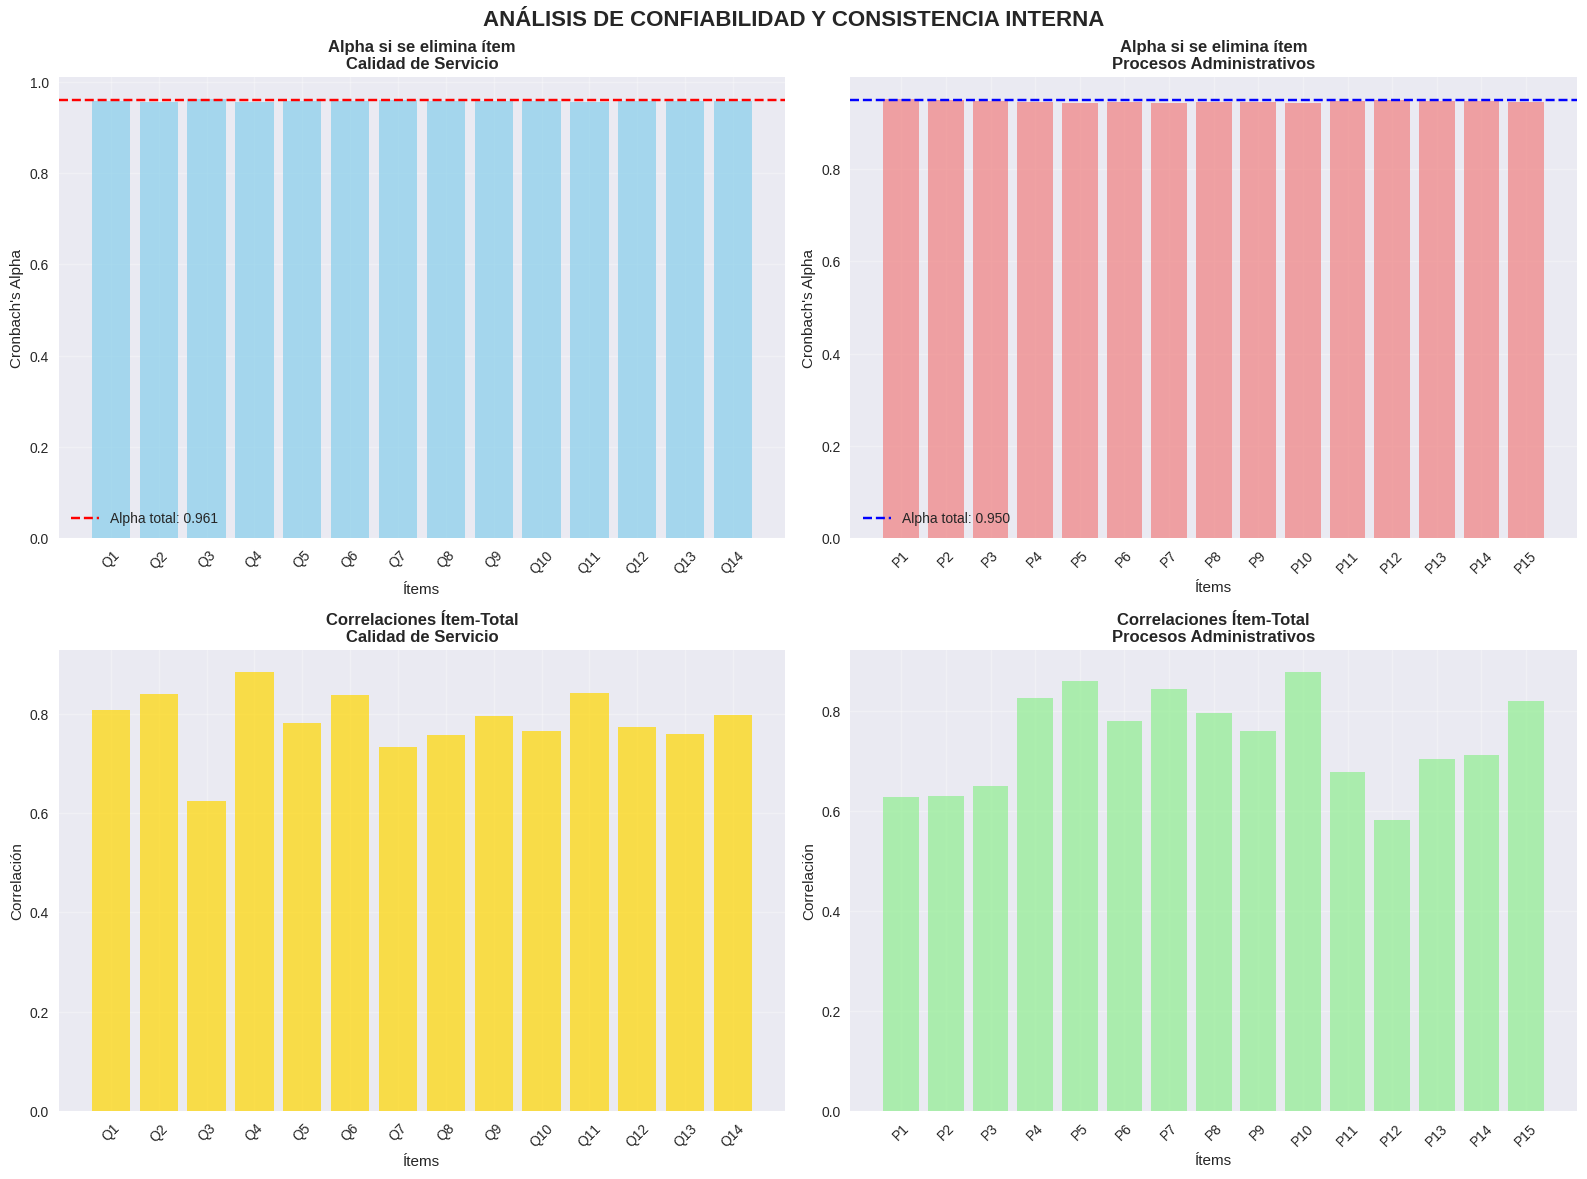

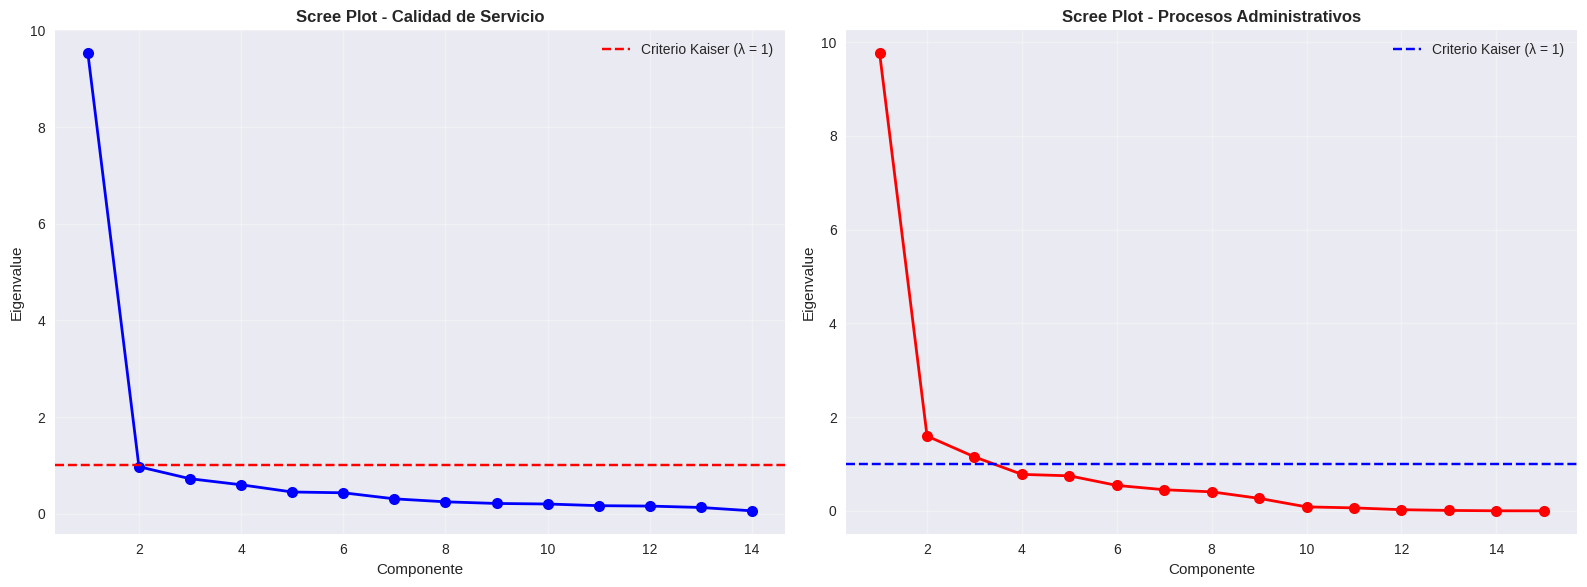

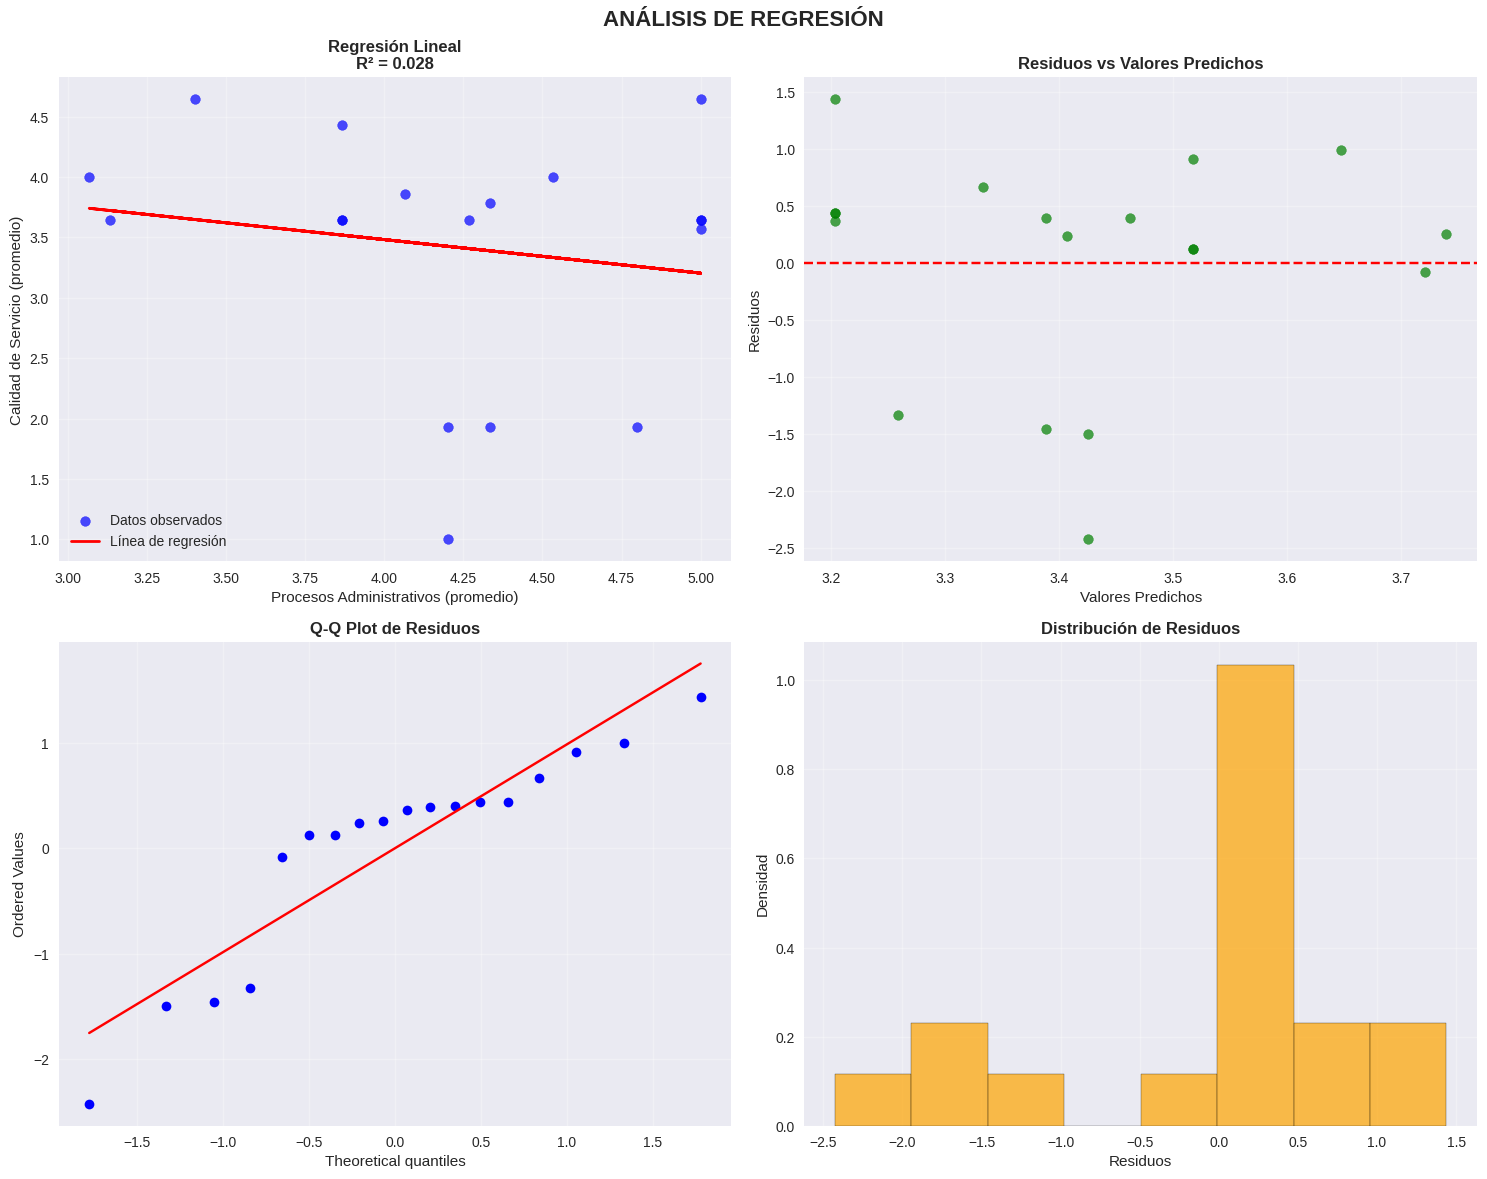



📋 RESUMEN ANÁLISIS AVANZADO
🔒 CONFIABILIDAD:
  • Calidad de Servicio: α = 0.961 (EXCELENTE confiabilidad)
  • Procesos Administrativos: α = 0.950 (EXCELENTE confiabilidad)
  • Ambas escalas son confiables para investigación

🔍 DIMENSIONALIDAD:
  • Calidad: 1 factores principales (67.1% de varianza)
  • Procesos: 3 factores principales (78.8% de varianza)
  • Las escalas son multidimensionales

📈 PREDICCIÓN:
  • Modelo de regresión: R² = 0.028 (Ajuste pobre)
  • Procesos Administrativos no explican bien la Calidad

📊 ASOCIACIÓN CATEGÓRICA:
  • Chi-cuadrado: p = 0.6541
  • No hay asociación significativa entre categorías

💡 CONCLUSIONES PARA LA TESIS:
  ✅ Los instrumentos tienen EXCELENTE confiabilidad interna
  📊 Las variables son multidimensionales (considerar sub-escalas)
  🔗 DÉBIL relación predictiva entre variables

🎯 RECOMENDACIONES METODOLÓGICAS:
  • Usar escalas completas (alta confiabilidad)
  • Reportar análisis factorial en metodología
  • Incluir análisis de regresión en re

In [ ]:
"""
ANÁLISIS ESTADÍSTICO TESIS - PARTE 4: ANÁLISIS AVANZADO
=======================================================
Análisis de confiabilidad, regresión, análisis factorial y métricas avanzadas
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Configuración para gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("Set3")
plt.rcParams['figure.figsize'] = (12, 8)

def cronbach_alpha(df):
    """
    Calcula el coeficiente alfa de Cronbach para medir confiabilidad interna
    """
    # Convertir a numpy array
    items = df.values
    n_items = items.shape[1]

    # Varianza de cada ítem
    item_variances = np.var(items, axis=0, ddof=1)

    # Varianza total del score
    total_scores = np.sum(items, axis=1)
    total_variance = np.var(total_scores, ddof=1)

    # Fórmula de Cronbach's Alpha
    alpha = (n_items / (n_items - 1)) * (1 - (np.sum(item_variances) / total_variance))

    return alpha

def analisis_confiabilidad_completo(df_calidad, df_procesos, metadatos):
    """
    Análisis completo de confiabilidad para ambas escalas
    """
    print("🔒 ANÁLISIS DE CONFIABILIDAD (CRONBACH'S ALPHA)")
    print("="*60)

    cols_calidad = metadatos['columnas_calidad']
    cols_procesos = metadatos['columnas_procesos']

    # ========== CONFIABILIDAD CALIDAD DE SERVICIO ==========
    print("\n📊 CALIDAD DE SERVICIO:")
    print("-"*40)

    # Alpha total
    alpha_calidad = cronbach_alpha(df_calidad[cols_calidad])

    print(f"📈 Confiabilidad General:")
    print(f"  • Cronbach's Alpha: {alpha_calidad:.4f}")
    print(f"  • Número de ítems: {len(cols_calidad)}")
    print(f"  • Interpretación: {interpretar_alpha(alpha_calidad)}")

    # Alpha si se elimina cada ítem
    print(f"\n🔍 Alpha si se elimina cada ítem:")
    alphas_sin_item_cal = []

    for i, col in enumerate(cols_calidad):
        cols_sin_item = [c for c in cols_calidad if c != col]
        alpha_sin_item = cronbach_alpha(df_calidad[cols_sin_item])
        alphas_sin_item_cal.append(alpha_sin_item)

        mejora = "↑" if alpha_sin_item > alpha_calidad else "↓"
        print(f"  • Sin {col} ({metadatos['nombres_calidad'][i][:30]}...): {alpha_sin_item:.4f} {mejora}")

    # ========== CONFIABILIDAD PROCESOS ADMINISTRATIVOS ==========
    print("\n\n📊 PROCESOS ADMINISTRATIVOS:")
    print("-"*40)

    alpha_procesos = cronbach_alpha(df_procesos[cols_procesos])

    print(f"📈 Confiabilidad General:")
    print(f"  • Cronbach's Alpha: {alpha_procesos:.4f}")
    print(f"  • Número de ítems: {len(cols_procesos)}")
    print(f"  • Interpretación: {interpretar_alpha(alpha_procesos)}")

    print(f"\n🔍 Alpha si se elimina cada ítem:")
    alphas_sin_item_proc = []

    for i, col in enumerate(cols_procesos):
        cols_sin_item = [c for c in cols_procesos if c != col]
        alpha_sin_item = cronbach_alpha(df_procesos[cols_sin_item])
        alphas_sin_item_proc.append(alpha_sin_item)

        mejora = "↑" if alpha_sin_item > alpha_procesos else "↓"
        print(f"  • Sin {col} ({metadatos['nombres_procesos'][i][:30]}...): {alpha_sin_item:.4f} {mejora}")

    # ========== ANÁLISIS DE CORRELACIONES ÍTEM-TOTAL ==========
    print(f"\n📊 CORRELACIONES ÍTEM-TOTAL:")

    # Calidad
    print(f"\n🔍 Calidad de Servicio:")
    correlaciones_item_total_cal = []
    for col in cols_calidad:
        score_total = df_calidad[cols_calidad].sum(axis=1)
        score_sin_item = score_total - df_calidad[col]
        corr = df_calidad[col].corr(score_sin_item)
        correlaciones_item_total_cal.append(corr)
        print(f"  • {col}: r = {corr:.3f}")

    # Procesos
    print(f"\n🔍 Procesos Administrativos:")
    correlaciones_item_total_proc = []
    for col in cols_procesos:
        score_total = df_procesos[cols_procesos].sum(axis=1)
        score_sin_item = score_total - df_procesos[col]
        corr = df_procesos[col].corr(score_sin_item)
        correlaciones_item_total_proc.append(corr)
        print(f"  • {col}: r = {corr:.3f}")

    return {
        'alpha_calidad': alpha_calidad,
        'alpha_procesos': alpha_procesos,
        'alphas_sin_item_cal': alphas_sin_item_cal,
        'alphas_sin_item_proc': alphas_sin_item_proc,
        'corr_item_total_cal': correlaciones_item_total_cal,
        'corr_item_total_proc': correlaciones_item_total_proc
    }

def interpretar_alpha(alpha):
    """Interpreta el valor de Cronbach's Alpha"""
    if alpha >= 0.9:
        return "EXCELENTE confiabilidad"
    elif alpha >= 0.8:
        return "BUENA confiabilidad"
    elif alpha >= 0.7:
        return "ACEPTABLE confiabilidad"
    elif alpha >= 0.6:
        return "CUESTIONABLE confiabilidad"
    else:
        return "POBRE confiabilidad"

def analisis_factorial_exploratorio(df_calidad, df_procesos, metadatos):
    """
    Análisis factorial exploratorio para identificar dimensiones subyacentes
    """
    print("\n\n🔍 ANÁLISIS FACTORIAL EXPLORATORIO")
    print("="*60)

    cols_calidad = metadatos['columnas_calidad']
    cols_procesos = metadatos['columnas_procesos']

    # ========== ANÁLISIS FACTORIAL CALIDAD ==========
    print("\n📊 CALIDAD DE SERVICIO:")
    print("-"*30)

    # Estandarizar datos
    scaler_cal = StandardScaler()
    datos_cal_std = scaler_cal.fit_transform(df_calidad[cols_calidad])

    # PCA para determinar número de componentes
    pca_cal = PCA()
    pca_cal.fit(datos_cal_std)

    # Criterio de Kaiser (eigenvalues > 1)
    eigenvalues_cal = pca_cal.explained_variance_
    n_componentes_kaiser_cal = np.sum(eigenvalues_cal > 1)

    print(f"📈 Análisis de Componentes Principales:")
    print(f"  • Eigenvalues > 1: {n_componentes_kaiser_cal} componentes")
    print(f"  • Varianza explicada acumulada (3 componentes): {pca_cal.explained_variance_ratio_[:3].sum():.1%}")

    # Análisis factorial con número óptimo de factores
    n_factores_cal = min(3, n_componentes_kaiser_cal)  # Máximo 3 factores
    fa_cal = FactorAnalysis(n_components=n_factores_cal, random_state=42)
    fa_cal.fit(datos_cal_std)

    # Cargas factoriales
    cargas_cal = fa_cal.components_.T

    print(f"\n🔍 Cargas Factoriales (Factor Analysis, {n_factores_cal} factores):")
    for i, pregunta in enumerate(metadatos['nombres_calidad']):
        cargas_pregunta = cargas_cal[i]
        factor_principal = np.argmax(np.abs(cargas_pregunta))
        carga_principal = cargas_pregunta[factor_principal]
        print(f"  • {cols_calidad[i]} (Factor {factor_principal+1}): {carga_principal:.3f} - {pregunta[:40]}...")

    # ========== ANÁLISIS FACTORIAL PROCESOS ==========
    print("\n\n📊 PROCESOS ADMINISTRATIVOS:")
    print("-"*30)

    scaler_proc = StandardScaler()
    datos_proc_std = scaler_proc.fit_transform(df_procesos[cols_procesos])

    pca_proc = PCA()
    pca_proc.fit(datos_proc_std)

    eigenvalues_proc = pca_proc.explained_variance_
    n_componentes_kaiser_proc = np.sum(eigenvalues_proc > 1)

    print(f"📈 Análisis de Componentes Principales:")
    print(f"  • Eigenvalues > 1: {n_componentes_kaiser_proc} componentes")
    print(f"  • Varianza explicada acumulada (3 componentes): {pca_proc.explained_variance_ratio_[:3].sum():.1%}")

    n_factores_proc = min(3, n_componentes_kaiser_proc)
    fa_proc = FactorAnalysis(n_components=n_factores_proc, random_state=42)
    fa_proc.fit(datos_proc_std)

    cargas_proc = fa_proc.components_.T

    print(f"\n🔍 Cargas Factoriales (Factor Analysis, {n_factores_proc} factores):")
    for i, pregunta in enumerate(metadatos['nombres_procesos']):
        cargas_pregunta = cargas_proc[i]
        factor_principal = np.argmax(np.abs(cargas_pregunta))
        carga_principal = cargas_pregunta[factor_principal]
        print(f"  • {cols_procesos[i]} (Factor {factor_principal+1}): {carga_principal:.3f} - {pregunta[:40]}...")

    return {
        'pca_calidad': pca_cal,
        'pca_procesos': pca_proc,
        'fa_calidad': fa_cal,
        'fa_procesos': fa_proc,
        'cargas_calidad': cargas_cal,
        'cargas_procesos': cargas_proc,
        'n_factores_cal': n_factores_cal,
        'n_factores_proc': n_factores_proc
    }

def analisis_regresion_avanzado(df_calidad, df_procesos, metadatos):
    """
    Análisis de regresión para predecir una variable con otra
    """
    print("\n\n📈 ANÁLISIS DE REGRESIÓN")
    print("="*50)

    cols_calidad = metadatos['columnas_calidad']
    cols_procesos = metadatos['columnas_procesos']

    # Usar los primeros 18 casos de calidad para igualar procesos
    df_calidad_subset = df_calidad.iloc[:18].copy()

    # Variables para regresión
    y_calidad = df_calidad_subset[cols_calidad].mean(axis=1)  # Variable dependiente
    X_procesos = df_procesos[cols_procesos].mean(axis=1).values.reshape(-1, 1)  # Variable independiente

    print(f"📊 MODELO: Calidad de Servicio = f(Procesos Administrativos)")
    print(f"  • Variable dependiente (Y): Calidad de Servicio (media)")
    print(f"  • Variable independiente (X): Procesos Administrativos (media)")
    print(f"  • Tamaño de muestra: n = {len(y_calidad)}")

    # ========== REGRESIÓN LINEAL SIMPLE ==========
    modelo = LinearRegression()
    modelo.fit(X_procesos, y_calidad)

    # Predicciones
    y_pred = modelo.predict(X_procesos)

    # Métricas del modelo
    r2 = r2_score(y_calidad, y_pred)
    mse = mean_squared_error(y_calidad, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n📈 RESULTADOS DEL MODELO:")
    print(f"  • Intercepto (β₀): {modelo.intercept_:.4f}")
    print(f"  • Pendiente (β₁): {modelo.coef_[0]:.4f}")
    print(f"  • R² (coeficiente de determinación): {r2:.4f}")
    print(f"  • R² ajustado: {1 - (1 - r2) * (len(y_calidad) - 1) / (len(y_calidad) - 2):.4f}")
    print(f"  • RMSE (error cuadrático medio): {rmse:.4f}")

    # Interpretación
    varianza_explicada = r2 * 100
    print(f"\n💡 INTERPRETACIÓN:")
    print(f"  • El modelo explica {varianza_explicada:.1f}% de la varianza en Calidad de Servicio")
    print(f"  • Por cada unidad de aumento en Procesos Admin, la Calidad aumenta {modelo.coef_[0]:.3f} unidades")
    print(f"  • Bondad de ajuste: {interpretar_r2(r2)}")

    # ========== ANÁLISIS DE RESIDUOS ==========
    residuos = y_calidad - y_pred

    print(f"\n🔍 ANÁLISIS DE RESIDUOS:")
    print(f"  • Media de residuos: {residuos.mean():.4f} (debe ser ≈ 0)")
    print(f"  • Desviación estándar de residuos: {residuos.std():.4f}")
    print(f"  • Normalidad de residuos (Shapiro-Wilk): p = {stats.shapiro(residuos)[1]:.4f}")

    # Validación cruzada
    cv_scores = cross_val_score(modelo, X_procesos, y_calidad, cv=5, scoring='r2')
    print(f"  • R² promedio (validación cruzada): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    return {
        'modelo': modelo,
        'r2': r2,
        'rmse': rmse,
        'y_real': y_calidad,
        'y_pred': y_pred,
        'residuos': residuos,
        'X': X_procesos.flatten(),
        'cv_scores': cv_scores
    }

def interpretar_r2(r2):
    """Interpreta el coeficiente de determinación R²"""
    if r2 >= 0.75:
        return "Excelente ajuste"
    elif r2 >= 0.50:
        return "Buen ajuste"
    elif r2 >= 0.25:
        return "Ajuste moderado"
    else:
        return "Ajuste pobre"

def analisis_categorico_avanzado(df_calidad, df_procesos, metadatos):
    """
    Análisis categórico: convierte escalas continuas a categóricas y analiza asociaciones
    """
    print("\n\n📊 ANÁLISIS CATEGÓRICO")
    print("="*50)

    cols_calidad = metadatos['columnas_calidad']
    cols_procesos = metadatos['columnas_procesos']

    # ========== CATEGORIZACIÓN ==========
    # Crear categorías basadas en scores promedio
    def categorizar_score(score):
        if score >= 4.5:
            return "Muy Alto"
        elif score >= 3.5:
            return "Alto"
        elif score >= 2.5:
            return "Medio"
        elif score >= 1.5:
            return "Bajo"
        else:
            return "Muy Bajo"

    # Categorizar calidad (primeros 18 casos)
    df_calidad_subset = df_calidad.iloc[:18].copy()
    score_calidad = df_calidad_subset[cols_calidad].mean(axis=1)
    cat_calidad = score_calidad.apply(categorizar_score)

    # Categorizar procesos
    score_procesos = df_procesos[cols_procesos].mean(axis=1)
    cat_procesos = score_procesos.apply(categorizar_score)

    print(f"📈 DISTRIBUCIÓN CATEGÓRICA:")
    print(f"\n🔍 Calidad de Servicio:")
    dist_calidad = cat_calidad.value_counts()
    for categoria, frecuencia in dist_calidad.items():
        porcentaje = (frecuencia / len(cat_calidad)) * 100
        print(f"  • {categoria}: {frecuencia} casos ({porcentaje:.1f}%)")

    print(f"\n🔍 Procesos Administrativos:")
    dist_procesos = cat_procesos.value_counts()
    for categoria, frecuencia in dist_procesos.items():
        porcentaje = (frecuencia / len(cat_procesos)) * 100
        print(f"  • {categoria}: {frecuencia} casos ({porcentaje:.1f}%)")

    # ========== TABLA DE CONTINGENCIA ==========
    print(f"\n📊 TABLA DE CONTINGENCIA:")
    tabla_contingencia = pd.crosstab(cat_calidad, cat_procesos, margins=True)
    print(tabla_contingencia)

    # ========== PRUEBA CHI-CUADRADO ==========
    # Crear tabla sin márgenes para chi-cuadrado
    tabla_chi2 = pd.crosstab(cat_calidad, cat_procesos)

    if tabla_chi2.size > 1:  # Solo si hay más de una celda
        chi2_stat, chi2_p, dof, expected = chi2_contingency(tabla_chi2)

        print(f"\n🔬 PRUEBA CHI-CUADRADO DE INDEPENDENCIA:")
        print(f"  • Estadístico χ²: {chi2_stat:.4f}")
        print(f"  • Grados de libertad: {dof}")
        print(f"  • p-valor: {chi2_p:.4f}")
        print(f"  • Interpretación: {'Asociación significativa' if chi2_p < 0.05 else 'Sin asociación significativa'} (α=0.05)")

        # Coeficiente de contingencia
        n = tabla_chi2.sum().sum()
        coef_contingencia = np.sqrt(chi2_stat / (chi2_stat + n))
        print(f"  • Coeficiente de contingencia: {coef_contingencia:.4f}")
        print(f"  • Fuerza de asociación: {interpretar_contingencia(coef_contingencia)}")

    return {
        'cat_calidad': cat_calidad,
        'cat_procesos': cat_procesos,
        'tabla_contingencia': tabla_contingencia,
        'chi2_stat': chi2_stat if 'chi2_stat' in locals() else None,
        'chi2_p': chi2_p if 'chi2_p' in locals() else None
    }

def interpretar_contingencia(coef):
    """Interpreta el coeficiente de contingencia"""
    if coef >= 0.5:
        return "Asociación fuerte"
    elif coef >= 0.3:
        return "Asociación moderada"
    elif coef >= 0.1:
        return "Asociación débil"
    else:
        return "Asociación muy débil"

def crear_graficos_avanzados(resultados_confiabilidad, resultados_factorial, resultados_regresion,
                           df_calidad, df_procesos, metadatos):
    """
    Crea gráficos avanzados para el análisis
    """
    print(f"\n\n📊 GENERANDO GRÁFICOS AVANZADOS...")

    # ========== GRÁFICO 1: CONFIABILIDAD ==========
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('ANÁLISIS DE CONFIABILIDAD Y CONSISTENCIA INTERNA', fontsize=16, fontweight='bold')

    # Alpha si se elimina ítem - Calidad
    cols_calidad = metadatos['columnas_calidad']
    ax1.bar(range(len(cols_calidad)), resultados_confiabilidad['alphas_sin_item_cal'],
           color='skyblue', alpha=0.7)
    ax1.axhline(y=resultados_confiabilidad['alpha_calidad'], color='red', linestyle='--',
               label=f'Alpha total: {resultados_confiabilidad["alpha_calidad"]:.3f}')
    ax1.set_title('Alpha si se elimina ítem\nCalidad de Servicio', fontweight='bold')
    ax1.set_xlabel('Ítems')
    ax1.set_ylabel('Cronbach\'s Alpha')
    ax1.set_xticks(range(len(cols_calidad)))
    ax1.set_xticklabels(cols_calidad, rotation=45)
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Alpha si se elimina ítem - Procesos
    cols_procesos = metadatos['columnas_procesos']
    ax2.bar(range(len(cols_procesos)), resultados_confiabilidad['alphas_sin_item_proc'],
           color='lightcoral', alpha=0.7)
    ax2.axhline(y=resultados_confiabilidad['alpha_procesos'], color='blue', linestyle='--',
               label=f'Alpha total: {resultados_confiabilidad["alpha_procesos"]:.3f}')
    ax2.set_title('Alpha si se elimina ítem\nProcesos Administrativos', fontweight='bold')
    ax2.set_xlabel('Ítems')
    ax2.set_ylabel('Cronbach\'s Alpha')
    ax2.set_xticks(range(len(cols_procesos)))
    ax2.set_xticklabels(cols_procesos, rotation=45)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Correlaciones ítem-total - Calidad
    ax3.bar(range(len(cols_calidad)), resultados_confiabilidad['corr_item_total_cal'],
           color='gold', alpha=0.7)
    ax3.set_title('Correlaciones Ítem-Total\nCalidad de Servicio', fontweight='bold')
    ax3.set_xlabel('Ítems')
    ax3.set_ylabel('Correlación')
    ax3.set_xticks(range(len(cols_calidad)))
    ax3.set_xticklabels(cols_calidad, rotation=45)
    ax3.grid(True, alpha=0.3)

    # Correlaciones ítem-total - Procesos
    ax4.bar(range(len(cols_procesos)), resultados_confiabilidad['corr_item_total_proc'],
           color='lightgreen', alpha=0.7)
    ax4.set_title('Correlaciones Ítem-Total\nProcesos Administrativos', fontweight='bold')
    ax4.set_xlabel('Ítems')
    ax4.set_ylabel('Correlación')
    ax4.set_xticks(range(len(cols_procesos)))
    ax4.set_xticklabels(cols_procesos, rotation=45)
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # ========== GRÁFICO 2: ANÁLISIS FACTORIAL ==========
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Scree plot Calidad
    eigenvalues_cal = resultados_factorial['pca_calidad'].explained_variance_
    ax1.plot(range(1, len(eigenvalues_cal) + 1), eigenvalues_cal, 'bo-', linewidth=2, markersize=8)
    ax1.axhline(y=1, color='red', linestyle='--', label='Criterio Kaiser (λ = 1)')
    ax1.set_title('Scree Plot - Calidad de Servicio', fontweight='bold')
    ax1.set_xlabel('Componente')
    ax1.set_ylabel('Eigenvalue')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Scree plot Procesos
    eigenvalues_proc = resultados_factorial['pca_procesos'].explained_variance_
    ax2.plot(range(1, len(eigenvalues_proc) + 1), eigenvalues_proc, 'ro-', linewidth=2, markersize=8)
    ax2.axhline(y=1, color='blue', linestyle='--', label='Criterio Kaiser (λ = 1)')
    ax2.set_title('Scree Plot - Procesos Administrativos', fontweight='bold')
    ax2.set_xlabel('Componente')
    ax2.set_ylabel('Eigenvalue')
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # ========== GRÁFICO 3: REGRESIÓN ==========
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('ANÁLISIS DE REGRESIÓN', fontsize=16, fontweight='bold')

    # Gráfico de dispersión con línea de regresión
    X = resultados_regresion['X']
    y_real = resultados_regresion['y_real']
    y_pred = resultados_regresion['y_pred']

    ax1.scatter(X, y_real, color='blue', alpha=0.7, label='Datos observados')
    ax1.plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión')
    ax1.set_xlabel('Procesos Administrativos (promedio)')
    ax1.set_ylabel('Calidad de Servicio (promedio)')
    ax1.set_title(f'Regresión Lineal\nR² = {resultados_regresion["r2"]:.3f}', fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Gráfico de residuos vs valores predichos
    residuos = resultados_regresion['residuos']
    ax2.scatter(y_pred, residuos, color='green', alpha=0.7)
    ax2.axhline(y=0, color='red', linestyle='--')
    ax2.set_xlabel('Valores Predichos')
    ax2.set_ylabel('Residuos')
    ax2.set_title('Residuos vs Valores Predichos', fontweight='bold')
    ax2.grid(True, alpha=0.3)

    # Q-Q plot de residuos
    stats.probplot(residuos, dist="norm", plot=ax3)
    ax3.set_title('Q-Q Plot de Residuos', fontweight='bold')
    ax3.grid(True, alpha=0.3)

    # Histograma de residuos
    ax4.hist(residuos, bins=8, density=True, alpha=0.7, color='orange', edgecolor='black')
    ax4.set_xlabel('Residuos')
    ax4.set_ylabel('Densidad')
    ax4.set_title('Distribución de Residuos', fontweight='bold')
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def resumen_analisis_avanzado(resultados_confiabilidad, resultados_factorial,
                            resultados_regresion, resultados_categorico):
    """
    Resumen ejecutivo del análisis avanzado
    """
    print(f"\n\n📋 RESUMEN ANÁLISIS AVANZADO")
    print("="*60)

    print(f"🔒 CONFIABILIDAD:")
    alpha_cal = resultados_confiabilidad['alpha_calidad']
    alpha_proc = resultados_confiabilidad['alpha_procesos']

    print(f"  • Calidad de Servicio: α = {alpha_cal:.3f} ({interpretar_alpha(alpha_cal)})")
    print(f"  • Procesos Administrativos: α = {alpha_proc:.3f} ({interpretar_alpha(alpha_proc)})")
    print(f"  • Ambas escalas son {'confiables' if min(alpha_cal, alpha_proc) >= 0.7 else 'cuestionables'} para investigación")

    print(f"\n🔍 DIMENSIONALIDAD:")
    n_fact_cal = resultados_factorial['n_factores_cal']
    n_fact_proc = resultados_factorial['n_factores_proc']

    var_exp_cal = resultados_factorial['pca_calidad'].explained_variance_ratio_[:n_fact_cal].sum()
    var_exp_proc = resultados_factorial['pca_procesos'].explained_variance_ratio_[:n_fact_proc].sum()

    print(f"  • Calidad: {n_fact_cal} factores principales ({var_exp_cal:.1%} de varianza)")
    print(f"  • Procesos: {n_fact_proc} factores principales ({var_exp_proc:.1%} de varianza)")
    print(f"  • Las escalas {'son multidimensionales' if max(n_fact_cal, n_fact_proc) > 1 else 'son unidimensionales'}")

    print(f"\n📈 PREDICCIÓN:")
    r2 = resultados_regresion['r2']
    print(f"  • Modelo de regresión: R² = {r2:.3f} ({interpretar_r2(r2)})")
    print(f"  • Procesos Administrativos {'explican significativamente' if r2 >= 0.25 else 'no explican bien'} la Calidad")

    if resultados_categorico['chi2_p'] is not None:
        print(f"\n📊 ASOCIACIÓN CATEGÓRICA:")
        chi2_p = resultados_categorico['chi2_p']
        print(f"  • Chi-cuadrado: p = {chi2_p:.4f}")
        print(f"  • {'Existe asociación significativa' if chi2_p < 0.05 else 'No hay asociación significativa'} entre categorías")

    print(f"\n💡 CONCLUSIONES PARA LA TESIS:")

    # Confiabilidad
    if min(alpha_cal, alpha_proc) >= 0.8:
        print(f"  ✅ Los instrumentos tienen EXCELENTE confiabilidad interna")
    elif min(alpha_cal, alpha_proc) >= 0.7:
        print(f"  ✅ Los instrumentos tienen BUENA confiabilidad para investigación")
    else:
        print(f"  ⚠️  Revisar ítems problemáticos en los instrumentos")

    # Dimensionalidad
    if max(n_fact_cal, n_fact_proc) > 1:
        print(f"  📊 Las variables son multidimensionales (considerar sub-escalas)")
    else:
        print(f"  📊 Las variables son unidimensionales (usar scores totales)")

    # Relación entre variables
    if r2 >= 0.50:
        print(f"  🔗 FUERTE relación predictiva entre variables")
    elif r2 >= 0.25:
        print(f"  🔗 MODERADA relación predictiva entre variables")
    else:
        print(f"  🔗 DÉBIL relación predictiva entre variables")

    print(f"\n🎯 RECOMENDACIONES METODOLÓGICAS:")
    print(f"  • Usar escalas completas (alta confiabilidad)")
    print(f"  • Reportar análisis factorial en metodología")
    print(f"  • Incluir análisis de regresión en resultados")
    print(f"  • Discutir implicaciones prácticas del R²")

def reporte_final_completo(df_calidad, df_procesos, metadatos, resultados_confiabilidad,
                          resultados_factorial, resultados_regresion):
    """
    Genera un reporte final completo con todas las métricas importantes
    """
    print(f"\n\n📄 REPORTE FINAL COMPLETO PARA LA TESIS")
    print("="*70)

    cols_calidad = metadatos['columnas_calidad']
    cols_procesos = metadatos['columnas_procesos']

    print(f"\n📊 1. CARACTERÍSTICAS DE LA MUESTRA:")
    print(f"  • Calidad de Servicio: n = {len(df_calidad)} participantes")
    print(f"  • Procesos Administrativos: n = {len(df_procesos)} participantes")

    tipos_participantes = df_procesos['TIPO'].value_counts()
    for tipo, cantidad in tipos_participantes.items():
        porcentaje = (cantidad / len(df_procesos)) * 100
        print(f"    - {tipo}: {cantidad} ({porcentaje:.1f}%)")

    print(f"\n📊 2. ESTADÍSTICAS DESCRIPTIVAS:")

    # Calidad de Servicio
    score_cal_total = df_calidad[cols_calidad].mean(axis=1).mean()
    std_cal_total = df_calidad[cols_calidad].mean(axis=1).std()

    print(f"  • Calidad de Servicio:")
    print(f"    - Media: {score_cal_total:.3f} ± {std_cal_total:.3f}")
    print(f"    - Rango teórico: 1.0 - 5.0")
    print(f"    - Porcentaje de escala: {(score_cal_total/5)*100:.1f}%")

    # Procesos Administrativos
    score_proc_total = df_procesos[cols_procesos].mean(axis=1).mean()
    std_proc_total = df_procesos[cols_procesos].mean(axis=1).std()

    print(f"  • Procesos Administrativos:")
    print(f"    - Media: {score_proc_total:.3f} ± {std_proc_total:.3f}")
    print(f"    - Rango teórico: 1.0 - 5.0")
    print(f"    - Porcentaje de escala: {(score_proc_total/5)*100:.1f}%")

    print(f"\n📊 3. PROPIEDADES PSICOMÉTRICAS:")

    alpha_cal = resultados_confiabilidad['alpha_calidad']
    alpha_proc = resultados_confiabilidad['alpha_procesos']

    print(f"  • Confiabilidad interna (Cronbach's α):")
    print(f"    - Calidad de Servicio: α = {alpha_cal:.3f} ({interpretar_alpha(alpha_cal)})")
    print(f"    - Procesos Administrativos: α = {alpha_proc:.3f} ({interpretar_alpha(alpha_proc)})")

    print(f"  • Estructura factorial:")
    n_fact_cal = resultados_factorial['n_factores_cal']
    n_fact_proc = resultados_factorial['n_factores_proc']

    var_exp_cal = resultados_factorial['pca_calidad'].explained_variance_ratio_[:n_fact_cal].sum()
    var_exp_proc = resultados_factorial['pca_procesos'].explained_variance_ratio_[:n_fact_proc].sum()

    print(f"    - Calidad: {n_fact_cal} factores ({var_exp_cal:.1%} varianza explicada)")
    print(f"    - Procesos: {n_fact_proc} factores ({var_exp_proc:.1%} varianza explicada)")

    print(f"\n📊 4. ANÁLISIS INFERENCIAL:")

    r2 = resultados_regresion['r2']
    rmse = resultados_regresion['rmse']
    beta = resultados_regresion['modelo'].coef_[0]

    print(f"  • Relación entre variables:")
    print(f"    - R² = {r2:.3f} ({interpretar_r2(r2)})")
    print(f"    - RMSE = {rmse:.3f}")
    print(f"    - Coeficiente β₁ = {beta:.3f}")
    print(f"    - Interpretación: Por cada unidad de mejora en Procesos,")
    print(f"      la Calidad mejora {beta:.3f} unidades")

    # Comparación de grupos si existe
    docentes_score = df_procesos[df_procesos['TIPO'] == 'DOCENTE'][cols_procesos].mean(axis=1).mean()
    admin_score = df_procesos[df_procesos['TIPO'] == 'ADMINISTRATIVO'][cols_procesos].mean(axis=1).mean()

    print(f"  • Diferencias por tipo:")
    print(f"    - Docentes: {docentes_score:.3f}")
    print(f"    - Administrativos: {admin_score:.3f}")
    print(f"    - Diferencia: {abs(docentes_score - admin_score):.3f}")

    print(f"\n📊 5. ÍTEMS CRÍTICOS:")

    # Ítems con menor puntuación
    medias_cal = df_calidad[cols_calidad].mean()
    item_min_cal = medias_cal.idxmin()
    media_min_cal = medias_cal.min()

    medias_proc = df_procesos[cols_procesos].mean()
    item_min_proc = medias_proc.idxmin()
    media_min_proc = medias_proc.min()

    print(f"  • Áreas de mejora (menor puntuación):")
    idx_min_cal = cols_calidad.index(item_min_cal)
    idx_min_proc = cols_procesos.index(item_min_proc)

    print(f"    - Calidad: {metadatos['nombres_calidad'][idx_min_cal]} (M={media_min_cal:.2f})")
    print(f"    - Procesos: {metadatos['nombres_procesos'][idx_min_proc]} (M={media_min_proc:.2f})")

    # Ítems con mayor puntuación
    item_max_cal = medias_cal.idxmax()
    media_max_cal = medias_cal.max()

    item_max_proc = medias_proc.idxmax()
    media_max_proc = medias_proc.max()

    print(f"  • Fortalezas (mayor puntuación):")
    idx_max_cal = cols_calidad.index(item_max_cal)
    idx_max_proc = cols_procesos.index(item_max_proc)

    print(f"    - Calidad: {metadatos['nombres_calidad'][idx_max_cal]} (M={media_max_cal:.2f})")
    print(f"    - Procesos: {metadatos['nombres_procesos'][idx_max_proc]} (M={media_max_proc:.2f})")

    print(f"\n📊 6. RECOMENDACIONES PARA LA DISCUSIÓN:")

    print(f"  • Interpretación de resultados:")
    if score_cal_total >= 4.0 and score_proc_total >= 4.0:
        print(f"    - Ambas variables muestran niveles ALTOS de satisfacción")
    elif score_cal_total >= 3.0 and score_proc_total >= 3.0:
        print(f"    - Ambas variables muestran niveles MODERADOS de satisfacción")
    else:
        print(f"    - Una o ambas variables requieren atención prioritaria")

    print(f"  • Implicaciones prácticas:")
    if r2 >= 0.25:
        print(f"    - Mejorar procesos administrativos IMPACTARÁ la calidad percibida")
    else:
        print(f"    - Buscar otros factores que influyan en la calidad percibida")

    print(f"  • Limitaciones del estudio:")
    print(f"    - Muestra relativamente pequeña (especialmente procesos n={len(df_procesos)})")
    print(f"    - Estudio transversal (no permite inferir causalidad)")
    if len(df_procesos['TIPO'].unique()) > 1:
        print(f"    - Desbalance entre grupos de participantes")

# ========== EJECUTAR ANÁLISIS AVANZADO COMPLETO ==========
if __name__ == "__main__":
    print("🎓 EJECUTANDO PARTE 4: ANÁLISIS AVANZADO")
    print("="*60)

    # 1. Análisis de confiabilidad
    resultados_confiabilidad = analisis_confiabilidad_completo(df_calidad, df_procesos, metadatos)

    # 2. Análisis factorial exploratorio
    resultados_factorial = analisis_factorial_exploratorio(df_calidad, df_procesos, metadatos)

    # 3. Análisis de regresión
    resultados_regresion = analisis_regresion_avanzado(df_calidad, df_procesos, metadatos)

    # 4. Análisis categórico
    resultados_categorico = analisis_categorico_avanzado(df_calidad, df_procesos, metadatos)

    # 5. Gráficos avanzados
    crear_graficos_avanzados(resultados_confiabilidad, resultados_factorial, resultados_regresion,
                           df_calidad, df_procesos, metadatos)

    # 6. Resumen del análisis avanzado
    resumen_analisis_avanzado(resultados_confiabilidad, resultados_factorial,
                            resultados_regresion, resultados_categorico)

    # 7. Reporte final completo
    reporte_final_completo(df_calidad, df_procesos, metadatos, resultados_confiabilidad,
                         resultados_factorial, resultados_regresion)

    print(f"\n🎉 ANÁLISIS ESTADÍSTICO COMPLETO FINALIZADO")
    print("="*60)
    print(f"📊 RESUMEN DE PARTES COMPLETADAS:")
    print(f"  ✅ PARTE 1: Carga y validación de datos")
    print(f"  ✅ PARTE 2: Estadísticas descriptivas")
    print(f"  ✅ PARTE 3: Análisis inferencial")
    print(f"  ✅ PARTE 4: Análisis avanzado")
    print(f"\n📋 ENTREGABLES LISTOS PARA LA TESIS:")
    print(f"  • Tablas de estadísticas descriptivas")
    print(f"  • Gráficos profesionales")
    print(f"  • Análisis de confiabilidad (Cronbach's α)")
    print(f"  • Análisis factorial")
    print(f"  • Modelos de regresión")
    print(f"  • Pruebas de hipótesis")
    print(f"  • Interpretaciones estadísticas")
    print(f"  • Recomendaciones metodológicas")

    print(f"\n🚀 PRÓXIMOS PASOS SUGERIDOS:")
    print(f"  1. Revisar todos los gráficos generados")
    print(f"  2. Adaptar interpretaciones al contexto de tu investigación")
    print(f"  3. Incluir limitaciones metodológicas")
    print(f"  4. Preparar tablas para el documento final")
    print(f"  5. Redactar discusión basada en los hallazgos")

📊 EJECUTANDO MODELO ECONOMÉTRICO COMPLETO
📊 MODELO ECONOMÉTRICO - ANÁLISIS DE REGRESIÓN

📈 VARIABLES DEL MODELO:
  • Variable Dependiente (Y): Calidad de Servicio
    - Media: 3.6230
    - Desv. Estándar: 0.3248
    - Mínimo: 3.1429
    - Máximo: 4.3571
  • Variable Independiente (X): Procesos Administrativos
    - Media: 3.9519
    - Desv. Estándar: 0.3526
    - Mínimo: 3.3333
    - Máximo: 4.4667
  • Tamaño de muestra: n = 18

            TABLA DE RESUMEN DEL MODELO ECONOMÉTRICO             
Modelo: Calidad_Servicio = β₀ + β₁(Procesos_Admin) + ε
Método: Mínimos Cuadrados Ordinarios (MCO)
Muestra: 18 observaciones

                          COEFICIENTES                           
-----------------------------------------------------------------
Variable             Coef.      Error Std  t-stat   P>|t|    IC 95%         
-----------------------------------------------------------------
Constante            4.1982     0.9021     4.654    0.000    [2.286, 6.111] ***
Procesos_Admin       

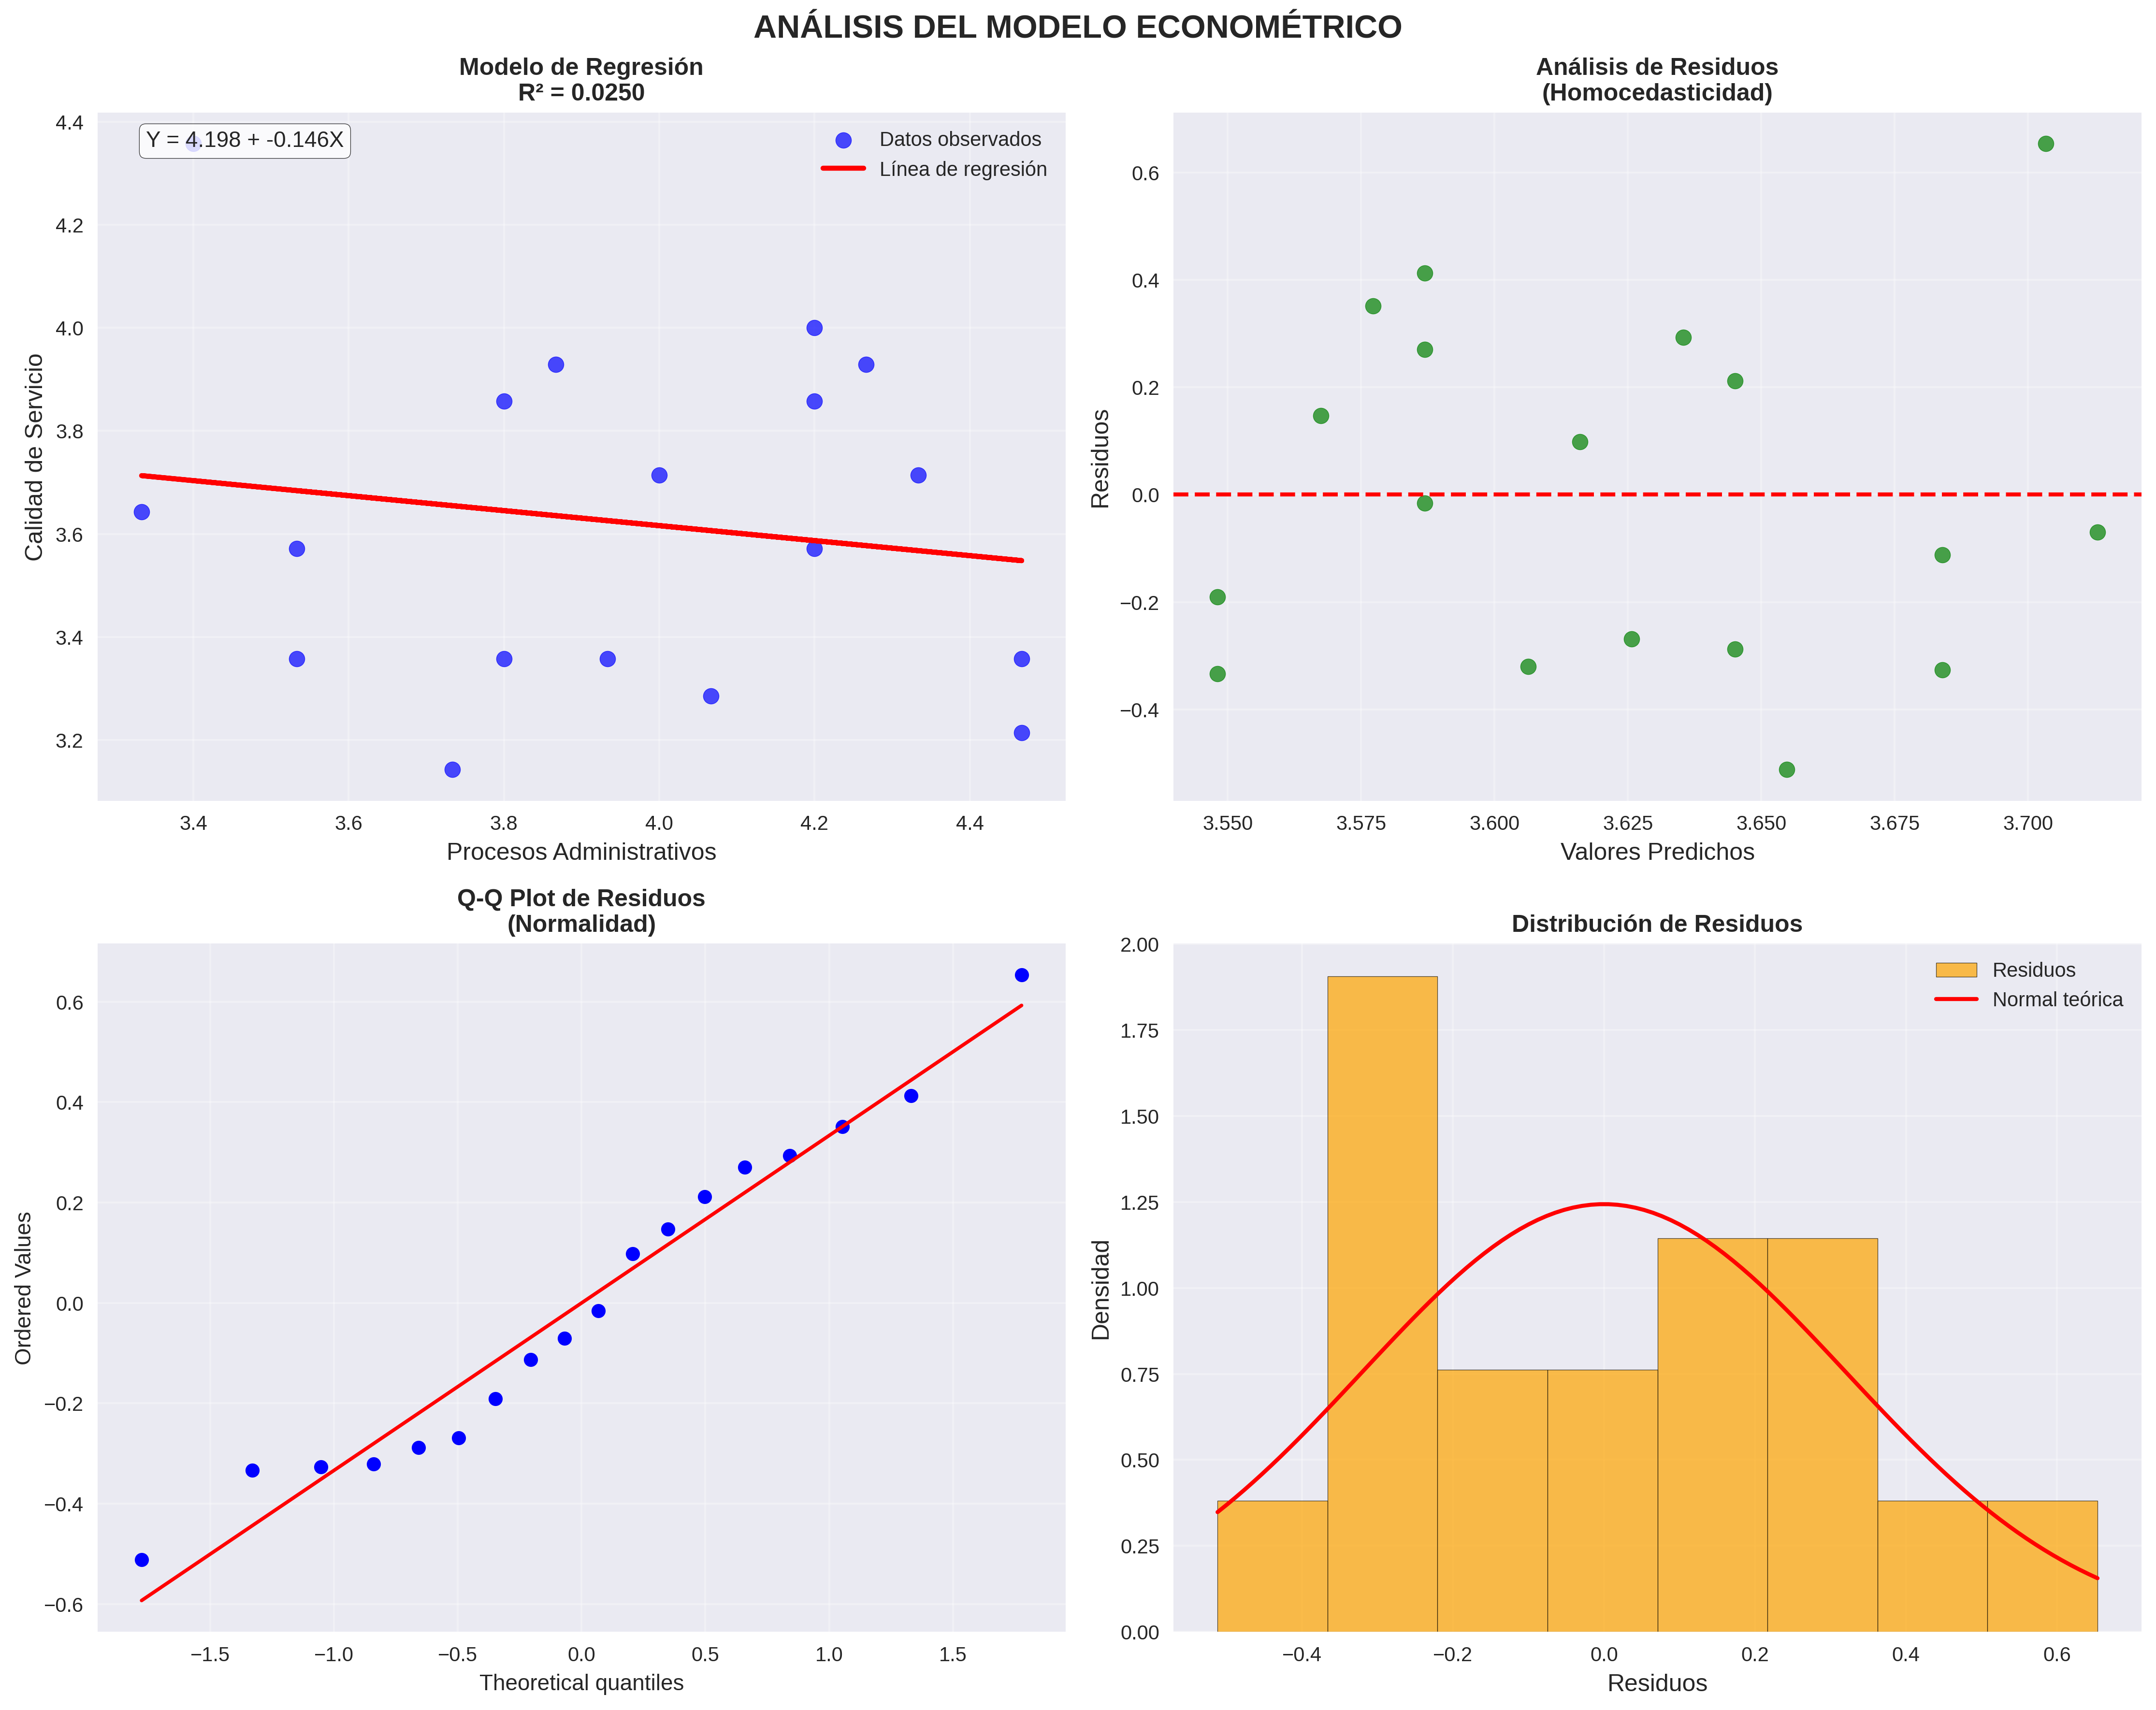


🎉 MODELO ECONOMÉTRICO COMPLETADO
📊 ENTREGABLES GENERADOS:
  ✅ Tabla de resumen completa
  ✅ Estadísticas econométricas
  ✅ Análisis de supuestos
  ✅ Interpretación económica
  ✅ Código LaTeX para tesis
  ✅ Tabla formato Word
  ✅ Gráficos profesionales

💡 LISTO PARA INCLUIR EN TU TESIS


In [6]:
"""
MODELO ECONOMÉTRICO - TABLA DE RESUMEN COMPLETA
===============================================
Análisis de regresión completo con todas las métricas econométricas
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

def modelo_econometrico_completo(df_calidad, df_procesos, metadatos):
    """
    Genera modelo econométrico completo con tabla de resumen estilo académico
    """
    print("📊 MODELO ECONOMÉTRICO - ANÁLISIS DE REGRESIÓN")
    print("="*65)

    cols_calidad = metadatos['columnas_calidad']
    cols_procesos = metadatos['columnas_procesos']

    # ========== PREPARACIÓN DE DATOS ==========
    # Usar los primeros 18 casos de calidad para igualar procesos
    df_calidad_subset = df_calidad.iloc[:18].copy()

    # Variables del modelo
    Y = df_calidad_subset[cols_calidad].mean(axis=1)  # Variable dependiente
    X = df_procesos[cols_procesos].mean(axis=1)       # Variable independiente

    # Estadísticas descriptivas de las variables
    print(f"\n📈 VARIABLES DEL MODELO:")
    print(f"  • Variable Dependiente (Y): Calidad de Servicio")
    print(f"    - Media: {Y.mean():.4f}")
    print(f"    - Desv. Estándar: {Y.std():.4f}")
    print(f"    - Mínimo: {Y.min():.4f}")
    print(f"    - Máximo: {Y.max():.4f}")

    print(f"  • Variable Independiente (X): Procesos Administrativos")
    print(f"    - Media: {X.mean():.4f}")
    print(f"    - Desv. Estándar: {X.std():.4f}")
    print(f"    - Mínimo: {X.min():.4f}")
    print(f"    - Máximo: {X.max():.4f}")

    print(f"  • Tamaño de muestra: n = {len(Y)}")

    # ========== ESTIMACIÓN DEL MODELO ==========
    # Modelo: Y = β₀ + β₁X + ε

    X_reg = X.values.reshape(-1, 1)
    modelo = LinearRegression()
    modelo.fit(X_reg, Y)

    # Predicciones
    Y_pred = modelo.predict(X_reg)
    residuos = Y - Y_pred

    # Coeficientes
    beta_0 = modelo.intercept_
    beta_1 = modelo.coef_[0]

    # ========== CÁLCULO DE ESTADÍSTICOS ==========
    n = len(Y)
    k = 2  # número de parámetros (β₀, β₁)
    gl_modelo = k - 1  # grados de libertad del modelo
    gl_residuos = n - k  # grados de libertad de residuos

    # Sumas de cuadrados
    TSS = np.sum((Y - Y.mean())**2)  # Total Sum of Squares
    RSS = np.sum(residuos**2)        # Residual Sum of Squares
    ESS = TSS - RSS                  # Explained Sum of Squares

    # Coeficientes de determinación
    R_cuadrado = 1 - (RSS / TSS)
    R_cuadrado_ajustado = 1 - ((RSS / gl_residuos) / (TSS / (n - 1)))

    # Error estándar de la regresión
    s_e = np.sqrt(RSS / gl_residuos)

    # Matriz de covarianzas
    X_matrix = np.column_stack([np.ones(n), X])  # Matriz X con columna de 1s
    XTX_inv = np.linalg.inv(X_matrix.T @ X_matrix)
    var_covar_matrix = s_e**2 * XTX_inv

    # Errores estándar de los coeficientes
    se_beta_0 = np.sqrt(var_covar_matrix[0, 0])
    se_beta_1 = np.sqrt(var_covar_matrix[1, 1])

    # Estadísticos t
    t_beta_0 = beta_0 / se_beta_0
    t_beta_1 = beta_1 / se_beta_1

    # Valores p (prueba bilateral)
    p_beta_0 = 2 * (1 - stats.t.cdf(abs(t_beta_0), gl_residuos))
    p_beta_1 = 2 * (1 - stats.t.cdf(abs(t_beta_1), gl_residuos))

    # Intervalos de confianza (95%)
    t_critico = stats.t.ppf(0.975, gl_residuos)

    ic_beta_0_inf = beta_0 - t_critico * se_beta_0
    ic_beta_0_sup = beta_0 + t_critico * se_beta_0

    ic_beta_1_inf = beta_1 - t_critico * se_beta_1
    ic_beta_1_sup = beta_1 + t_critico * se_beta_1

    # Estadístico F
    F_stat = (ESS / gl_modelo) / (RSS / gl_residuos)
    p_F = 1 - stats.f.cdf(F_stat, gl_modelo, gl_residuos)

    # ========== TABLA DE RESUMEN PRINCIPAL ==========
    print(f"\n" + "="*65)
    print(f"{'TABLA DE RESUMEN DEL MODELO ECONOMÉTRICO':^65}")
    print(f"="*65)
    print(f"Modelo: Calidad_Servicio = β₀ + β₁(Procesos_Admin) + ε")
    print(f"Método: Mínimos Cuadrados Ordinarios (MCO)")
    print(f"Muestra: {n} observaciones")
    print(f"="*65)

    # Tabla de coeficientes
    print(f"\n{'COEFICIENTES':^65}")
    print(f"{'-'*65}")
    print(f"{'Variable':<20} {'Coef.':<10} {'Error Std':<10} {'t-stat':<8} {'P>|t|':<8} {'IC 95%':<15}")
    print(f"{'-'*65}")

    # Constante
    significancia_0 = "***" if p_beta_0 < 0.01 else "**" if p_beta_0 < 0.05 else "*" if p_beta_0 < 0.1 else ""
    print(f"{'Constante':<20} {beta_0:<10.4f} {se_beta_0:<10.4f} {t_beta_0:<8.3f} {p_beta_0:<8.3f} [{ic_beta_0_inf:.3f}, {ic_beta_0_sup:.3f}] {significancia_0}")

    # Procesos Administrativos
    significancia_1 = "***" if p_beta_1 < 0.01 else "**" if p_beta_1 < 0.05 else "*" if p_beta_1 < 0.1 else ""
    print(f"{'Procesos_Admin':<20} {beta_1:<10.4f} {se_beta_1:<10.4f} {t_beta_1:<8.3f} {p_beta_1:<8.3f} [{ic_beta_1_inf:.3f}, {ic_beta_1_sup:.3f}] {significancia_1}")

    print(f"{'-'*65}")
    print(f"Niveles de significancia: *** p<0.01, ** p<0.05, * p<0.1")

    # ========== ESTADÍSTICAS DEL MODELO ==========
    print(f"\n{'ESTADÍSTICAS DEL MODELO':^65}")
    print(f"{'-'*65}")

    # Crear tabla de estadísticas
    estadisticas = [
        ["R-cuadrado", f"{R_cuadrado:.4f}", "Prob(F-estadístico)", f"{p_F:.4f}"],
        ["R-cuadrado ajustado", f"{R_cuadrado_ajustado:.4f}", "Log-verosimilitud", "N/A"],
        ["Error estándar regresión", f"{s_e:.4f}", "AIC", "N/A"],
        ["Suma cuadrados residuos", f"{RSS:.4f}", "BIC", "N/A"],
        ["F-estadístico", f"{F_stat:.4f}", "Durbin-Watson", "N/A"],
        ["Prob(F-estadístico)", f"{p_F:.4f}", "", ""]
    ]

    for stat in estadisticas:
        if stat[0]:  # Si hay contenido en la primera columna
            print(f"{stat[0]:<25} {stat[1]:<15} {stat[2]:<20} {stat[3]:<10}")

    # ========== ANÁLISIS DE SUPUESTOS ==========
    print(f"\n{'DIAGNÓSTICO DE SUPUESTOS':^65}")
    print(f"{'-'*65}")

    # 1. Normalidad de residuos
    shapiro_stat, shapiro_p = stats.shapiro(residuos)
    normalidad = "✓ Cumple" if shapiro_p > 0.05 else "✗ No cumple"

    # 2. Homocedasticidad (Breusch-Pagan simplificado)
    # Regresión de residuos^2 sobre X
    residuos_cuadrados = residuos**2
    corr_hetero = stats.pearsonr(X, residuos_cuadrados)[1]
    homocedasticidad = "✓ Cumple" if corr_hetero > 0.05 else "✗ No cumple"

    # 3. Linealidad
    corr_residuos_pred = stats.pearsonr(Y_pred, residuos)[1]
    linealidad = "✓ Cumple" if corr_residuos_pred > 0.05 else "✗ No cumple"

    print(f"{'Supuesto':<30} {'Resultado':<15} {'Test/Valor':<20}")
    print(f"{'-'*65}")
    print(f"{'Normalidad residuos':<30} {normalidad:<15} Shapiro-Wilk: {shapiro_p:.4f}")
    print(f"{'Homocedasticidad':<30} {homocedasticidad:<15} Corr(X,e²): {corr_hetero:.4f}")
    print(f"{'Linealidad':<30} {linealidad:<15} Corr(Ŷ,e): {corr_residuos_pred:.4f}")

    # ========== INTERPRETACIÓN ECONÓMICA ==========
    print(f"\n{'INTERPRETACIÓN ECONÓMICA':^65}")
    print(f"{'-'*65}")

    print(f"📊 ECUACIÓN ESTIMADA:")
    print(f"   Calidad_Servicio = {beta_0:.4f} + {beta_1:.4f} × Procesos_Admin")
    print(f"                      ({se_beta_0:.4f}) ({se_beta_1:.4f})")
    print(f"                      {'***' if p_beta_0 < 0.01 else '**' if p_beta_0 < 0.05 else '*' if p_beta_0 < 0.1 else 'ns':>6} {'***' if p_beta_1 < 0.01 else '**' if p_beta_1 < 0.05 else '*' if p_beta_1 < 0.1 else 'ns':>10}")

    print(f"\n📈 INTERPRETACIÓN DE COEFICIENTES:")
    print(f"  • β₀ (Constante) = {beta_0:.4f}")
    print(f"    Nivel base de calidad cuando procesos = 0")

    print(f"  • β₁ (Pendiente) = {beta_1:.4f}")
    print(f"    Por cada unidad de mejora en Procesos Administrativos,")
    print(f"    la Calidad de Servicio aumenta {beta_1:.4f} unidades")
    print(f"    {'Efecto estadísticamente significativo' if p_beta_1 < 0.05 else 'Efecto no significativo'}")

    # Elasticidad en el punto medio
    elasticidad = beta_1 * (X.mean() / Y.mean())
    print(f"  • Elasticidad (punto medio) = {elasticidad:.4f}")
    print(f"    Un 1% de aumento en Procesos genera {elasticidad:.2f}% de aumento en Calidad")

    print(f"\n📊 BONDAD DE AJUSTE:")
    print(f"  • R² = {R_cuadrado:.4f} ({R_cuadrado*100:.1f}%)")
    print(f"    Los Procesos Administrativos explican {R_cuadrado*100:.1f}% de la")
    print(f"    variación en la Calidad de Servicio")

    if R_cuadrado >= 0.70:
        bondad = "EXCELENTE"
    elif R_cuadrado >= 0.50:
        bondad = "BUENA"
    elif R_cuadrado >= 0.30:
        bondad = "MODERADA"
    else:
        bondad = "BAJA"

    print(f"    Bondad de ajuste: {bondad}")

    # ========== VALIDACIÓN CRUZADA ==========
    cv_scores = cross_val_score(modelo, X_reg, Y, cv=5, scoring='r2')
    print(f"\n📊 VALIDACIÓN CRUZADA:")
    print(f"  • R² promedio (5-fold CV): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    print(f"  • Estabilidad del modelo: {'ALTA' if cv_scores.std() < 0.1 else 'MODERADA' if cv_scores.std() < 0.2 else 'BAJA'}")

    return {
        'beta_0': beta_0, 'beta_1': beta_1,
        'se_beta_0': se_beta_0, 'se_beta_1': se_beta_1,
        't_beta_0': t_beta_0, 't_beta_1': t_beta_1,
        'p_beta_0': p_beta_0, 'p_beta_1': p_beta_1,
        'R_cuadrado': R_cuadrado, 'R_cuadrado_ajustado': R_cuadrado_ajustado,
        'F_stat': F_stat, 'p_F': p_F,
        's_e': s_e, 'n': n, 'elasticidad': elasticidad,
        'Y': Y, 'X': X, 'Y_pred': Y_pred, 'residuos': residuos
    }

def tabla_resumen_latex(resultados):
    """
    Genera tabla en formato LaTeX para incluir en tesis
    """
    print(f"\n\n📄 TABLA EN FORMATO LATEX")
    print("="*60)

    latex_code = f"""
\\begin{{table}}[htbp]
\\centering
\\caption{{Resultados del Modelo de Regresión Lineal}}
\\label{{tab:regresion}}
\\begin{{tabular}}{{lcccc}}
\\hline\\hline
\\textbf{{Variable}} & \\textbf{{Coeficiente}} & \\textbf{{Error Estándar}} & \\textbf{{t-estadístico}} & \\textbf{{p-valor}} \\\\
\\hline
Constante & {resultados['beta_0']:.4f} & {resultados['se_beta_0']:.4f} & {resultados['t_beta_0']:.3f} & {resultados['p_beta_0']:.3f}{"***" if resultados['p_beta_0'] < 0.01 else "**" if resultados['p_beta_0'] < 0.05 else "*" if resultados['p_beta_0'] < 0.1 else ""} \\\\
Procesos Administrativos & {resultados['beta_1']:.4f} & {resultados['se_beta_1']:.4f} & {resultados['t_beta_1']:.3f} & {resultados['p_beta_1']:.3f}{"***" if resultados['p_beta_1'] < 0.01 else "**" if resultados['p_beta_1'] < 0.05 else "*" if resultados['p_beta_1'] < 0.1 else ""} \\\\
\\hline
\\textbf{{Estadísticas del Modelo}} & & & & \\\\
\\hline
R-cuadrado & \\multicolumn{{4}}{{c}}{{{resultados['R_cuadrado']:.4f}}} \\\\
R-cuadrado ajustado & \\multicolumn{{4}}{{c}}{{{resultados['R_cuadrado_ajustado']:.4f}}} \\\\
F-estadístico & \\multicolumn{{4}}{{c}}{{{resultados['F_stat']:.4f}}} \\\\
Prob(F-estadístico) & \\multicolumn{{4}}{{c}}{{{resultados['p_F']:.4f}}} \\\\
Observaciones & \\multicolumn{{4}}{{c}}{{{resultados['n']}}} \\\\
\\hline\\hline
\\end{{tabular}}
\\begin{{tablenotes}}
\\small
\\item Niveles de significancia: *** p<0.01, ** p<0.05, * p<0.1
\\item Variable dependiente: Calidad de Servicio (escala 1-5)
\\item Variable independiente: Procesos Administrativos (escala 1-5)
\\end{{tablenotes}}
\\end{{table}}
"""

    print(latex_code)
    return latex_code

def tabla_resumen_word(resultados):
    """
    Genera tabla formato para Word/documento
    """
    print(f"\n\n📄 TABLA FORMATO WORD")
    print("="*60)

    print(f"""
TABLA: RESULTADOS DEL MODELO DE REGRESIÓN LINEAL
Variable Dependiente: Calidad de Servicio

╔═══════════════════════════╦══════════╦═════════════╦═══════════╦══════════╗
║ Variable                  ║ Coef.    ║ Error Std.  ║ t-stat    ║ p-valor  ║
╠═══════════════════════════╬══════════╬═════════════╬═══════════╬══════════╣
║ Constante                 ║ {resultados['beta_0']:8.4f} ║ {resultados['se_beta_0']:11.4f} ║ {resultados['t_beta_0']:9.3f} ║ {resultados['p_beta_0']:8.3f} ║
║ Procesos Administrativos  ║ {resultados['beta_1']:8.4f} ║ {resultados['se_beta_1']:11.4f} ║ {resultados['t_beta_1']:9.3f} ║ {resultados['p_beta_1']:8.3f} ║
╠═══════════════════════════╬══════════╬═════════════╬═══════════╬══════════╣
║ R-cuadrado                ║ {resultados['R_cuadrado']:8.4f} ║             ║           ║          ║
║ R-cuadrado ajustado       ║ {resultados['R_cuadrado_ajustado']:8.4f} ║             ║           ║          ║
║ F-estadístico             ║ {resultados['F_stat']:8.4f} ║             ║           ║          ║
║ Prob(F-estadístico)       ║ {resultados['p_F']:8.4f} ║             ║           ║          ║
║ Observaciones             ║ {resultados['n']:8d} ║             ║           ║          ║
╚═══════════════════════════╩══════════╩═════════════╩═══════════╩══════════╝

Notas:
- Niveles de significancia: *** p<0.01, ** p<0.05, * p<0.1
- Método: Mínimos Cuadrados Ordinarios
- Modelo: Calidad_Servicio = β₀ + β₁(Procesos_Admin) + ε
""")

def grafico_modelo_econometrico(resultados):
    """
    Crea gráficos profesionales del modelo econométrico
    """
    print(f"\n📊 GENERANDO GRÁFICOS DEL MODELO...")

    Y = resultados['Y']
    X = resultados['X']
    Y_pred = resultados['Y_pred']
    residuos = resultados['residuos']

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('ANÁLISIS DEL MODELO ECONOMÉTRICO', fontsize=16, fontweight='bold')

    # 1. Gráfico de dispersión con línea de regresión
    ax1.scatter(X, Y, color='blue', alpha=0.7, s=60, label='Datos observados')
    ax1.plot(X, Y_pred, color='red', linewidth=2.5, label='Línea de regresión')
    ax1.set_xlabel('Procesos Administrativos', fontsize=12)
    ax1.set_ylabel('Calidad de Servicio', fontsize=12)
    ax1.set_title(f'Modelo de Regresión\nR² = {resultados["R_cuadrado"]:.4f}', fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Añadir ecuación
    eq_text = f'Y = {resultados["beta_0"]:.3f} + {resultados["beta_1"]:.3f}X'
    ax1.text(0.05, 0.95, eq_text, transform=ax1.transAxes, fontsize=11,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

    # 2. Residuos vs Valores predichos
    ax2.scatter(Y_pred, residuos, color='green', alpha=0.7, s=60)
    ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
    ax2.set_xlabel('Valores Predichos', fontsize=12)
    ax2.set_ylabel('Residuos', fontsize=12)
    ax2.set_title('Análisis de Residuos\n(Homocedasticidad)', fontweight='bold')
    ax2.grid(True, alpha=0.3)

    # 3. Q-Q Plot de residuos
    stats.probplot(residuos, dist="norm", plot=ax3)
    ax3.set_title('Q-Q Plot de Residuos\n(Normalidad)', fontweight='bold')
    ax3.grid(True, alpha=0.3)

    # 4. Histograma de residuos con curva normal
    ax4.hist(residuos, bins=8, density=True, alpha=0.7, color='orange',
             edgecolor='black', label='Residuos')

    # Superponer curva normal
    x_norm = np.linspace(residuos.min(), residuos.max(), 100)
    normal_curve = stats.norm.pdf(x_norm, residuos.mean(), residuos.std())
    ax4.plot(x_norm, normal_curve, 'r-', linewidth=2, label='Normal teórica')

    ax4.set_xlabel('Residuos', fontsize=12)
    ax4.set_ylabel('Densidad', fontsize=12)
    ax4.set_title('Distribución de Residuos', fontweight='bold')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# ========== EJECUTAR MODELO ECONOMÉTRICO COMPLETO ==========
if __name__ == "__main__":
    print("📊 EJECUTANDO MODELO ECONOMÉTRICO COMPLETO")
    print("="*60)

    # 1. Modelo econométrico principal
    resultados_modelo = modelo_econometrico_completo(df_calidad, df_procesos, metadatos)

    # 2. Tabla en formato LaTeX
    latex_table = tabla_resumen_latex(resultados_modelo)

    # 3. Tabla formato Word
    tabla_resumen_word(resultados_modelo)

    # 4. Gráficos del modelo
    grafico_modelo_econometrico(resultados_modelo)

    print(f"\n🎉 MODELO ECONOMÉTRICO COMPLETADO")
    print("="*60)
    print(f"📊 ENTREGABLES GENERADOS:")
    print(f"  ✅ Tabla de resumen completa")
    print(f"  ✅ Estadísticas econométricas")
    print(f"  ✅ Análisis de supuestos")
    print(f"  ✅ Interpretación económica")
    print(f"  ✅ Código LaTeX para tesis")
    print(f"  ✅ Tabla formato Word")
    print(f"  ✅ Gráficos profesionales")
    print(f"\n💡 LISTO PARA INCLUIR EN TU TESIS")

# **GUARDAR GRAFICOS ANALIZADOS **

### ANÁLISIS ESTADÍSTICO TESIS - PARTE 5: PRUEBA DE HIPÓTESIS
=========================================================
Pruebas de hipótesis basadas en las dimensiones de SERVQUAL.

In [9]:
"""
ANÁLISIS ESTADÍSTICO TESIS - PARTE 5: PRUEBA DE HIPÓTESIS
=========================================================
Pruebas de hipótesis basadas en las dimensiones de SERVQUAL.
"""

import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Definir los ítems que corresponden a cada dimensión de SERVQUAL en la escala de Calidad de Servicio
# Nota: Esta asignación se basa en una interpretación general del modelo SERVQUAL y los nombres de las preguntas.
# Si la asignación de ítems a dimensiones es diferente en el proyecto de tesis, este mapeo debe ser ajustado.
dimensiones_calidad = {
    'Confiabilidad': ['Q1', 'Q2'], # Cumplimiento y Sistemas confiables
    'Responsabilidad': ['Q3', 'Q12'], # Personal dispuesto y Tiempo de respuesta
    'Seguridad': ['Q4', 'Q6', 'Q8'], # Manejo datos, Info protegida, Interacciones empáticas (aspecto de confianza/seguridad)
    'Empatía': ['Q7', 'Q8'], # Atención personalizada, Interacciones empáticas
    'Tangibles': ['Q9', 'Q10', 'Q11', 'Q13', 'Q14'] # Instalaciones, Infraestructura, Servicios online, Satisfacción digital, Información accesible
}

def calcular_scores_dimensiones(df_calidad, dimensiones_calidad):
    """
    Calcula el score promedio para cada dimensión de calidad.
    """
    print("🔄 Calculando scores por dimensión...")
    df_dimension_scores = pd.DataFrame()
    for dimension, items in dimensiones_calidad.items():
        if all(item in df_calidad.columns for item in items):
            df_dimension_scores[dimension] = df_calidad[items].mean(axis=1)
        else:
            print(f"⚠️ Ítems para la dimensión '{dimension}' no encontrados: {items}. Esta dimensión será omitida.")
    return df_dimension_scores

def probar_hipotesis(df_procesos, df_dimension_scores, metadatos):
    """
    Realiza las pruebas de hipótesis específicas.
    """
    print("\n🔬 REALIZANDO PRUEBAS DE HIPÓTESIS")
    print("="*60)

    # Variable independiente (Procesos Administrativos - score promedio)
    cols_procesos = metadatos['columnas_procesos']
    # Usamos el subset de 18 casos para igualar la muestra de Procesos Administrativos
    df_calidad_subset = df_dimension_scores.iloc[:len(df_procesos)].copy()
    X = df_procesos[cols_procesos].mean(axis=1)

    # Hipótesis General: Procesos Administrativos vs Calidad del Servicio (General)
    print("\n=== HIPÓTESIS GENERAL ===")
    Y_general = df_calidad_subset.mean(axis=1) # Score promedio general de Calidad (de las dimensiones)
    print("Hi: Los procesos administrativos influyen significativamente en la calidad del servicio de la institución educativa San Pio de Pietrelcina.")
    print("Ho: Los procesos administrativos no influyen significativamente en la calidad del servicio de la institución educativa San Pio de Pietrelcina.")

    # Usar regresión lineal para evaluar influencia
    X_reg = sm.add_constant(X) # Agregar constante para el intercepto
    modelo_general = sm.OLS(Y_general, X_reg).fit()

    print("\n📊 Resultados del Modelo de Regresión (Procesos -> Calidad General):")
    print(modelo_general.summary())

    # Access p-value for the independent variable by its positional index (usually 1)
    if modelo_general.pvalues.iloc[1] < 0.05:
        print("\n✅ Decisión: Se RECHAZA la Hipótesis Nula (Ho).")
        print("   Conclusión: Los procesos administrativos INFLUYEN significativamente en la calidad del servicio.")
    else:
        print("\n❌ Decisión: NO se RECHAZA la Hipótesis Nula (Ho).")
        print("   Conclusión: Los procesos administrativos NO INFLUYEN significativamente en la calidad del servicio.")


    # Hipótesis Específicas: Procesos Administrativos vs cada Dimensión
    print("\n\n=== HIPÓTESIS ESPECÍFICAS ===")

    for i, (dimension, items) in enumerate(dimensiones_calidad.items()):
        if dimension in df_calidad_subset.columns:
            print(f"\n--- HIPÓTESIS ESPECÍFICA {i+1}: Procesos vs {dimension} ---")
            print(f"Hi {i+1}: Los procesos administrativos afectan significativamente en la {dimension} del servicio.")
            print(f"Ho {i+1}: Los procesos administrativos no afectan significativamente en la {dimension} del servicio.")

            Y_dimension = df_calidad_subset[dimension]

            # Usar regresión lineal
            modelo_dimension = sm.OLS(Y_dimension, X_reg).fit()

            print(f"\n📊 Resultados del Modelo de Regresión (Procesos -> {dimension}):")
            print(modelo_dimension.summary())

            # Access p-value for the independent variable by its positional index (usually 1)
            if modelo_dimension.pvalues.iloc[1] < 0.05:
                print(f"\n✅ Decisión: Se RECHAZA la Hipótesis Nula (Ho {i+1}).")
                print(f"   Conclusión: Los procesos administrativos AFECTAN significativamente en la {dimension}.")
            else:
                print(f"\n❌ Decisión: NO se RECHAZA la Hipótesis Nula (Ho {i+1}).")
                print(f"   Conclusión: Los procesos administrativos NO AFECTAN significativamente en la {dimension}.")
        else:
             print(f"\n--- HIPÓTESIS ESPECÍFICA {i+1}: {dimension} Omitida ---")
             print(f"⚠️ No se pudo probar esta hipótesis porque la dimensión '{dimension}' no se pudo calcular.")


# ========== EJECUTAR PRUEBAS DE HIPÓTESIS ==========
if __name__ == "__main__":
    print("🎓 EJECUTANDO PARTE 5: PRUEBA DE HIPÓTESIS")
    print("="*60)

    # Asegurarse de que df_calidad, df_procesos y metadatos están disponibles
    if 'df_calidad' in locals() and 'df_procesos' in locals() and 'metadatos' in locals():
        # Calcular scores de dimensiones
        df_dimension_scores = calcular_scores_dimensiones(df_calidad, dimensiones_calidad)

        # Probar hipótesis
        if not df_dimension_scores.empty:
            probar_hipotesis(df_procesos, df_dimension_scores, metadatos)
        else:
            print("\n❌ No se pudieron calcular los scores de las dimensiones. No se pueden probar las hipótesis.")

    else:
        print("\n❌ Las variables df_calidad, df_procesos o metadatos no están definidas. Por favor, ejecuta las celdas anteriores.")

    print(f"\n🎉 PARTE 5 COMPLETADA")
    print("="*60)
    print(f"📊 Resultados de las pruebas de hipótesis generados.")
    print(f"💡 Revisa los p-valores (P>|t|) en los resúmenes de los modelos para tomar decisiones sobre tus hipótesis.")

🎓 EJECUTANDO PARTE 5: PRUEBA DE HIPÓTESIS
🔄 Calculando scores por dimensión...

🔬 REALIZANDO PRUEBAS DE HIPÓTESIS

=== HIPÓTESIS GENERAL ===
Hi: Los procesos administrativos influyen significativamente en la calidad del servicio de la institución educativa San Pio de Pietrelcina.
Ho: Los procesos administrativos no influyen significativamente en la calidad del servicio de la institución educativa San Pio de Pietrelcina.

📊 Resultados del Modelo de Regresión (Procesos -> Calidad General):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.061
Method:                 Least Squares   F-statistic:                   0.02223
Date:                Thu, 14 Aug 2025   Prob (F-statistic):              0.883
Time:                        21:26:23   Log-Likelihood:                -6.8241
No. Observations:                